## Navigation

<ul>
<li><a href="#import">Import & Options </a></li>
<li><a href="#plot_format_function">Plot Formatting Function</a></li>
<b><li><a href="#feature_engineering" style="font-size: 18px" > Data Cleaning & Feature Engineering</a></li></b>
    <ul>
        <li><a href="#count_tech_function">Count Tech Function</a></li>
        <li><a href="#unique_language_list">Create Unique Language List </a></li>
        <li><a href="#create_language_columns"> Create Language Columns </a></li>    
        <li><a href="#save_modified_version"> Save Modified Version </a></li>
    </ul>
    <b><li><a href="#plots" style="font-size: 18px"> Plots</a></li></b>
    <ul>
        <li><a href="#all_salaries">All Salaries </a></li>
        <li><a href="#all_salaries_boxplot_inc_outliers">All Salaries Boxplot - Inc Outliers</a></li>
        <li><a href="#respondent_by_gender">Respondent by Gender</a></li>
        <li><a href="#all_salaries_boxplot_exc_outliers">All Salaries Boxplot Excluding Outliers</a></li>
        <li><a href="#continent_comp_boxplot">Converted Comp By Contient Boxplot</a></li>
        <li><a href="#global_correlation">Correlation Strength Globally</a></li>
        <li><a href="#country_correlation"> Correlation by Country</a></li>
        <li><a href="#top_correlation">Top Correlating Features</a></li>
        <li><a href="#top_5_correlation"> Frequency of Top 5 Features for Each Country</a></li>
        <li><a href="#extraversion_salary_effect">Extraversion Effect on Salary</a></li>
        <li><a href="#current_desired_language">Current and Desired Language Counts</a></li>
        <li><a href="#current_desired_database">Current & Desired Database Counts</a></li>
        <li><a href="#language_pop_and_avg_salary">Language Popularity & Average Salary</a></li>
        <li><a href="#github_barchart">Github Barchart</a></li>
        <li><a href="#avg_salary_barchart">Average Salary Barchart</a></li>
    </ul>



<b><li><a href="#datasets" style="font-size: 18px">Datasets</a></li></b>
    <ul>
        <li><a href="#salary_data">Salary Data</a></li>
        <li><a href="#technology_data">Technology Data</a></li>
        <li><a href="#survey_data">Survey Data</a></li>
    </ul>
<b><li><a href="#graveyard" style="font-size: 18px">Code Graveyard</a></li></b>
</ul>




### <a class="anchor" id="import">Import and Options</a>



In [1]:
import numpy as np
import pycountry_convert as pc
from collections import Counter

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split

#Pandas Options
import pandas as pd
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 400000)
pd.set_option("display.width", 1000)

#Seaborn Options

import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette('muted')
import matplotlib.pyplot as plt

#Matplotlib options
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = [20, 10]

font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)



plot_path = '/Users/nathanprice/Dropbox/Python/Coursera/IBM Data Analyst/Capstone/StackOverflowSurveyDashboard/Plots/'
data_path = '/Users/nathanprice/Dropbox/Python/Coursera/IBM Data Analyst/Capstone/StackOverflowSurveyDashboard/assets/'


In [2]:
# Data Import 

salary_data = pd.read_excel(f'{data_path}language_salary_data.xlsx')
salary_data['Average Salary'] = salary_data['Average Annual Salary'].apply(lambda x: int(x.replace("$", '').replace(',', '')))
salary_data.drop(columns=['Unnamed: 0'], inplace=True)

survey_data = pd.read_csv(f'{data_path}/m1_survey_data.csv')

technology_data = pd.read_excel(f'{data_path}technology_count.xlsx')


### <a class="anchor" id="plot_format_function">Plot Format Function</a>

In [3]:
def format_plot(fig, title, y_axis_currency=False, hide_x=False, hide_y=False):
    title = title.title()
    if y_axis_currency == True:
        y_ticks = fig.get_yticks()
        fig.set(yticklabels=[f"${int(x)}" for x in y_ticks])
    
    fig.set_title(title, pad=30, fontsize=35)
    fig.set_xlabel(fig.get_xlabel().title(), labelpad=20, fontsize=30)
    fig.set_ylabel(fig.get_ylabel().title(), labelpad=20, fontsize=30)
    
    if hide_x == True:
        fig.set(xlabel=None)
        fig.set_xticklabels([])
    if hide_y == True:
        fig.set(ylabel=None)
        fig.set_yticklabels([])
    

    plt.savefig(f"{plot_path}{title}.png", dpi=500)
    plt.show();
    return fig

### <a class="anchor" id="all_salaries">All Salaries</a>

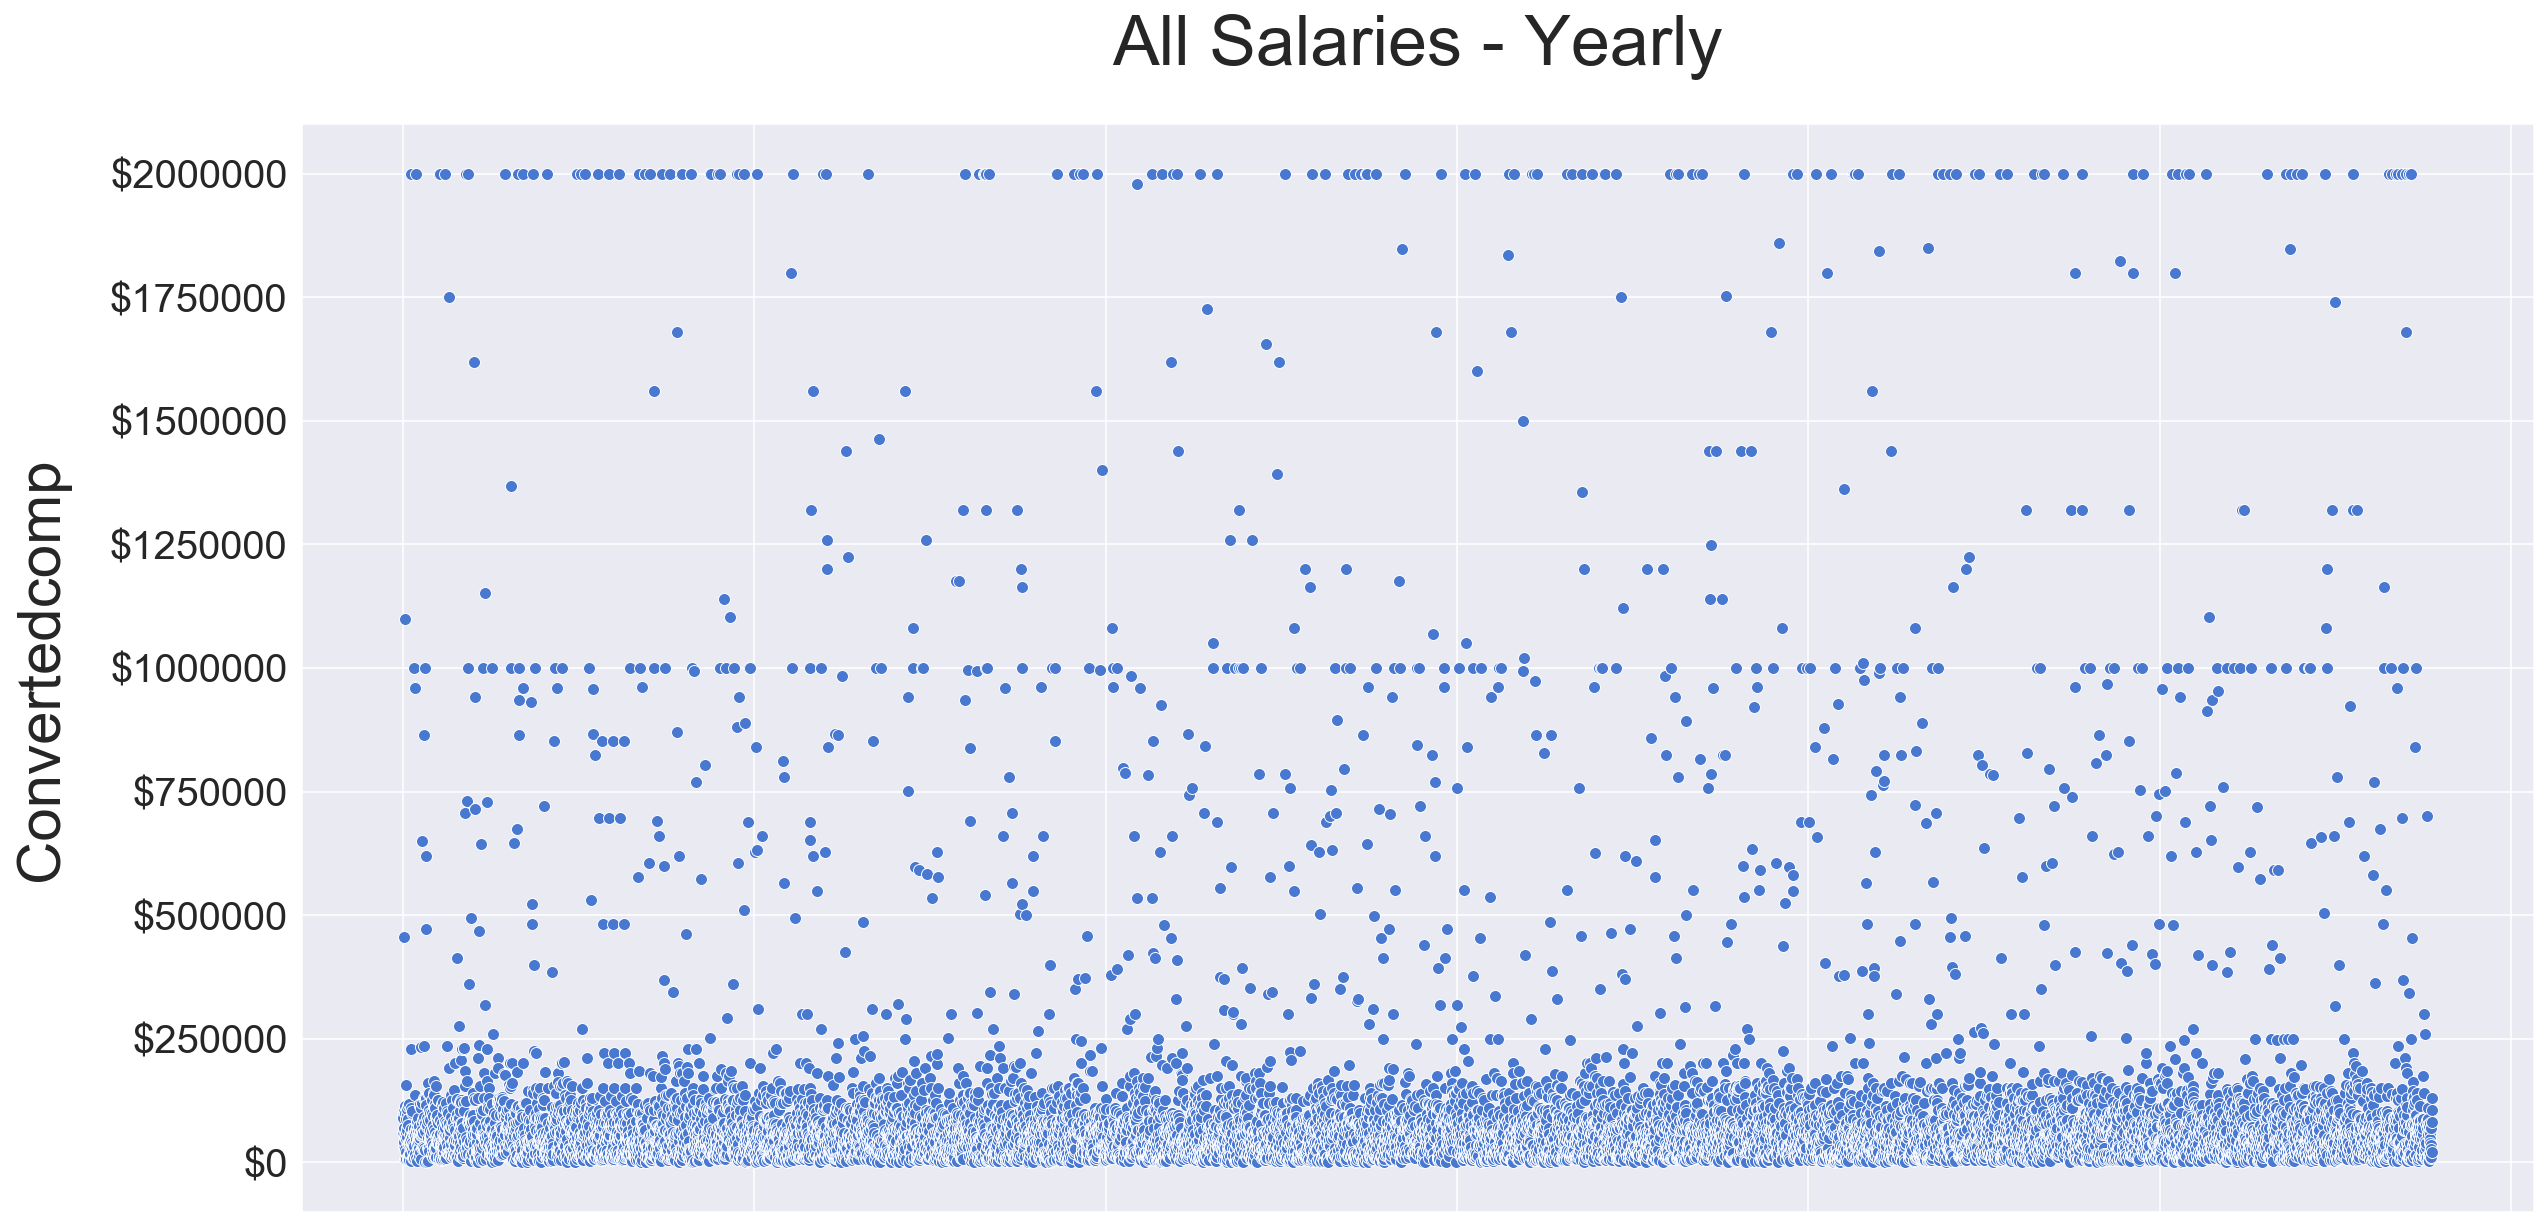

In [4]:
title = 'All Salaries - Yearly'
fig = sns.scatterplot(data=survey_data, x=survey_data.index, y='ConvertedComp')

format_plot(fig, title, y_axis_currency=True, hide_x=True)

### <a class="anchor" id="all_salaries_boxplot_inc_outliers">All Salaries Boxplot - Inc Outliers</a>

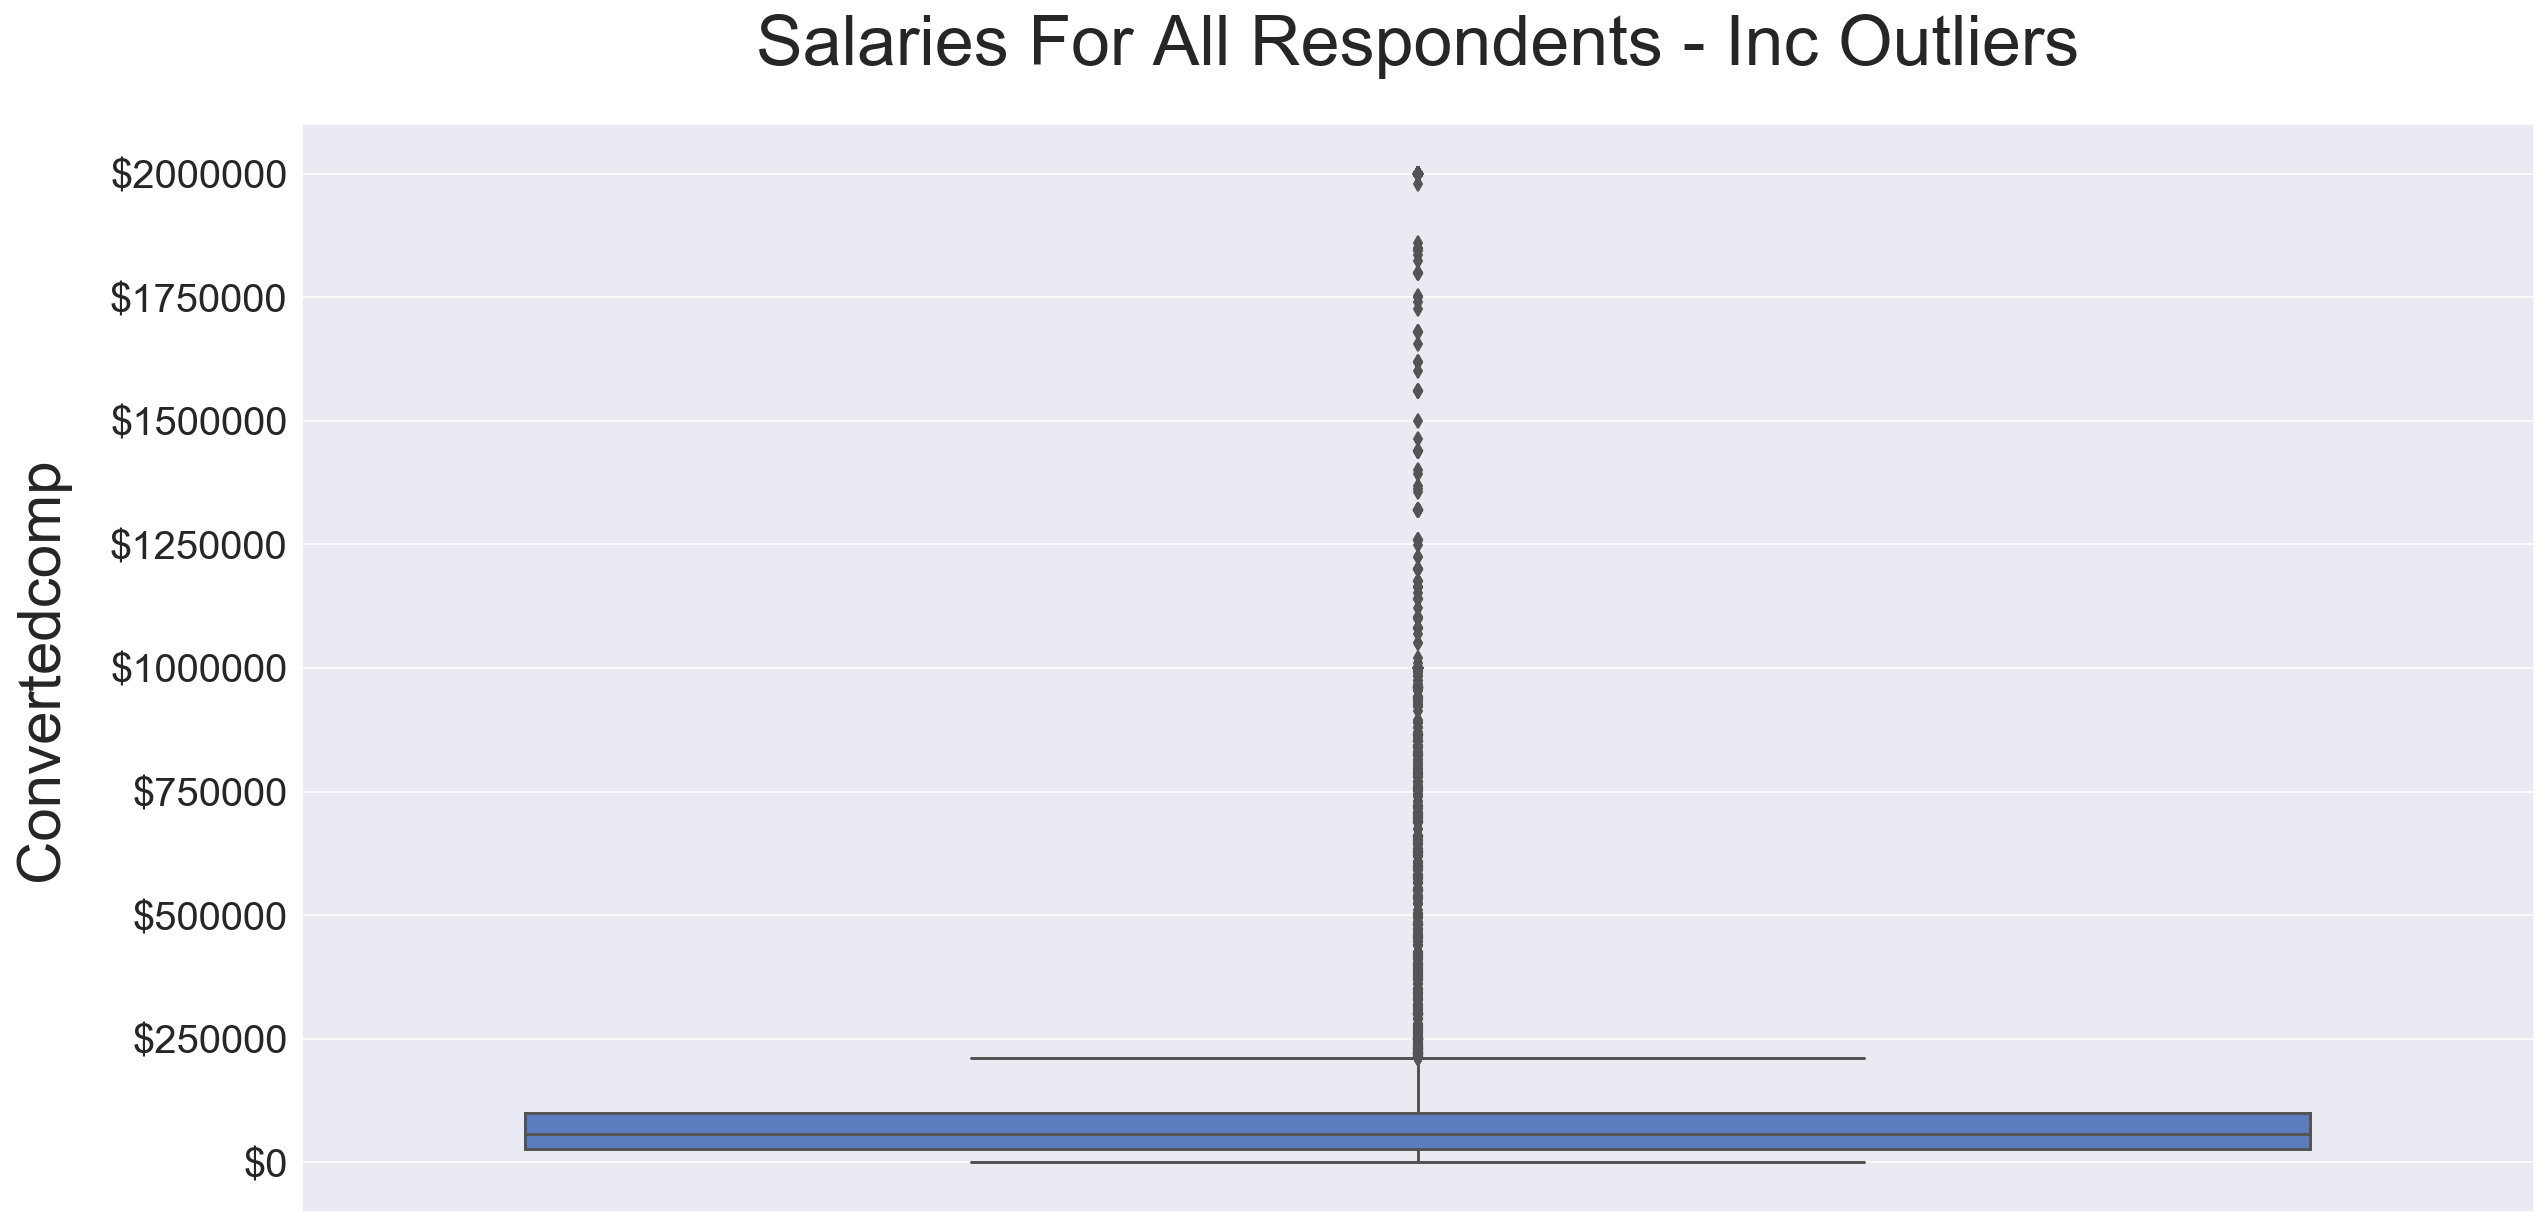

In [5]:
title = 'Salaries for all respondents - Inc Outliers'
fig = sns.boxplot(data=survey_data, y='ConvertedComp')

format_plot(fig, title, y_axis_currency=True, hide_x=True)

### <a class="anchor" id="feature_engineering">Data Cleaning & Feature Engineering</a>

In [6]:
survey_data = pd.read_csv('Assets/m1_survey_data.csv')
print (f"Length of survey_data is {len(survey_data)}")

# Outlier Removal
survey_data = survey_data[survey_data['ConvertedComp'] < 250000]


# def remove_outliers(dataframe, column_name):

#     Q1 = dataframe[column_name].quantile(0.25)
#     Q3 = dataframe[column_name].quantile(0.75)
#     IQR = Q3 - Q1

#     dataframe = dataframe[~(dataframe[column_name] < (Q1 - 1.5 * IQR) ) | (dataframe[column_name] > (Q3 - 1.5 * IQR) )]

#     return dataframe

# survey_data = remove_outliers(survey_data, 'ConvertedComp')


# Only retain middle 50% of the data 
# Q1 = survey_data['ConvertedComp'].quantile(0.25)
# survey_data = survey_data[survey_data['ConvertedComp'] > Q1]
# Q3 = survey_data['ConvertedComp'].quantile(0.75)
# survey_data = survey_data[survey_data['ConvertedComp'] < Q3]

# Remove zero values
survey_data.dropna(subset=['ConvertedComp'], inplace=True)


# Create lists within columns

def create_list_from_string(value):
    try:
        value = (value.split(';'))
#         value = ', '.join(value)
        return value
    except AttributeError:
        return np.nan
    
survey_data['LanguageWorkedWith'] = survey_data['LanguageWorkedWith'].apply(create_list_from_string)
survey_data['LanguageDesireNextYear'] = survey_data['LanguageDesireNextYear'].apply(create_list_from_string)

survey_data['DatabaseWorkedWith'] = survey_data['DatabaseWorkedWith'].apply(create_list_from_string)
survey_data['DatabaseDesireNextYear'] = survey_data['DatabaseDesireNextYear'].apply(create_list_from_string)

# Create Category for Number of Languages Known
# survey_data['NumberLanguagesKnown'] = survey_data['LanguageWorkedWith'].apply(lambda x: len((x)))
# survey_data['NumberLanguagesKnownCategory'] = pd.cut(survey_data['NumberLanguagesKnown'],3, labels=["Low", "Medium", "High"])


# Create numerical variable for Number of years Coding
def years_code(YearsCode):
    
    if YearsCode == 'Less than 1 year':
        return 1
    if type(YearsCode) == str:
        return int(YearsCode)
    else:
        return 0

survey_data['YearsCode'] = survey_data['YearsCode'].apply(years_code)

# Create numerical variable for age started coding
def age_1st_code(Age1stCode):
    
    if Age1stCode == 'Younger than 5 years':
        return 1
    if type(Age1stCode) == str:
        return int(Age1stCode)
    else:
        return 0

survey_data['Age1stCode'] = survey_data['Age1stCode'].apply(age_1st_code)

# Create numerical variable for years coding professionally
survey_data['YearsCodePro'] = survey_data['YearsCodePro'].apply(years_code)


# Create numerical varibale for education level
def ed_level(EdLevel):
    ed_level_dict = {'I never completed any formal education': 0,
                     'Primary/elementary school': 1,
                     'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 2,
                     'Some college/university study without earning a degree': 3,
                    'Bachelor’s degree (BA, BS, B.Eng., etc.)': 4,
                     'Associate degree': 4,
                    'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 5,
                    'Other doctoral degree (Ph.D, Ed.D., etc.)': 6,
                    'Professional degree (JD, MD, etc.)': 6,
                    np.nan: 0}
    return ed_level_dict[EdLevel]

survey_data['EdLevelVal'] = survey_data['EdLevel'].apply(ed_level)


# Create numerical varibale for Satisfaction level
def satisfaction_level(Satisfaction):
    satisfaction_dict = {'Very dissatisfied': 1, 
                        'Slightly dissatisfied': 2,
                        'Neither satisfied nor dissatisfied': 3, 
                        'Slightly satisfied': 4,
                        'Very satisfied': 5,
                        np.nan: 0}
    
    return satisfaction_dict[Satisfaction]

survey_data['JobSatVal'] = survey_data['JobSat'].apply(satisfaction_level)
survey_data['CareerSatVal'] = survey_data['CareerSat'].apply(satisfaction_level)

#Create Numerical Variable for Last Hire Date
def last_hire_date(LastHireDate):
    
    hire_date_dict = {'Less than a year ago': 1,
                     '1-2 year ago': 2,
                     'More than 4 years ago': 5,
                     '3-4 years ago': 4,
                     'NA - I am an independent contractor or self employed': np.nan,
                     "I've never had a job": np.nan}

# Create numerical Varibale for Hobbyist
survey_data['HobbyistVal'] = np.where(survey_data['Hobbyist'] == 'Yes', 1, 0)

# Create Numerical Variable for mainly developer, or not
survey_data['MainBranchVal'] = np.where(survey_data['MainBranch'] == 'I am a developer by profession', 1, 0)

# Reduce Gender Features 
def gender_features(Gender):
    if Gender == 'Man' or Gender == 'Woman':
        return Gender
    else:
        return 'Non-Binary'
    
survey_data['GenderReduced'] = survey_data['Gender'].apply(gender_features)

# Get continent information
def get_country_code(country):
    continent_dictionary = {'EU': 'Europe',
                           'NA': 'North America',
                           'AF': 'Africa',
                           'OC': 'Oceania',
                           'AS': 'Asia',
                           'SA': 'South America',
                            0: 'Unknown'}
    try:
    
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")

        continent_name = pc.country_alpha2_to_continent_code(country_code)

        return continent_dictionary[continent_name]
    except KeyError:
        return continent_dictionary[0]

survey_data['Continent'] = survey_data['Country'].apply(get_country_code)


# Create Categorical Age Group
bins = list(range(17, 93, 7))
labels = []
for i in range(len(bins)):
    try:
        string = f'{bins[i] + 1} to {bins[i + 1]}'
        labels.append(string)

    except IndexError:
        pass


survey_data['AgeGroup'] = pd.cut(survey_data['Age'],
                                bins=bins,
                                labels=labels)

# Create Categorical Salary Group

bins = list(range(0, 275000, 25000))

labels = []

for i in range(len(bins)):
    try:
        string = f'${bins[i]} to ${bins[i + 1] - 1}'
        labels.append(string)

    except IndexError:
        pass

survey_data['ConvertedCompGroup'] = pd.cut(survey_data['ConvertedComp'],
                                          bins=bins,
                                          labels=labels)

survey_data.reset_index(inplace=True, drop=True)

print ('All Data Transformation Complete')
print (f"Length of survey_data is {len(survey_data)}")

Length of survey_data is 11552
All Data Transformation Complete
Length of survey_data is 9914


### <a class="anchor" id="count_tech_function">Count Tech Function</a>

In [7]:
def count_tech_function(CurrentWorkedWith, FutureWorkedWith):
    survey_data_no_nan = survey_data[[CurrentWorkedWith, FutureWorkedWith]].dropna().reset_index()
    length = len(survey_data_no_nan)
    current_tech_info = []
    future_tech_info = []
    
    for i in range(0, length):

        current_data = survey_data_no_nan[CurrentWorkedWith].iloc[[i]].values[0]
        [current_tech_info.append(language) if type(language) == str else 'None Specified' for language in current_data]
        
        future_data = survey_data_no_nan[FutureWorkedWith].iloc[[i]].values[0]
        [future_tech_info.append(language) if type(language) == str else 'None Specified' for language in future_data]
            
    return current_tech_info, future_tech_info

### <a class="anchor" id="unique_language_list">Create Unique Language List</a>

In [8]:
current_language_list, _ = count_tech_function('LanguageWorkedWith', 'LanguageDesireNextYear')

language_info_unique = ','.join(set(current_language_list))
language_info_unique = language_info_unique.replace('nan,', '')
language_info_unique = language_info_unique.replace('Other(s):,', '')

file = open(f"{data_path}language_info_unique.txt", "w")
file.write(language_info_unique)
file.close()

list_language_info_unique = sorted(language_info_unique.split(','))

### <a class="anchor" id="create_language_columns">Create Language Columns</a>

In [9]:
length = len(survey_data)
modified_survey_data = survey_data.copy()


lang = modified_survey_data['LanguageWorkedWith'].iloc[[0]].values[0]
test = pd.DataFrame()
for i in range(0, length):
    data = modified_survey_data['LanguageWorkedWith'].iloc[[i]].values[0]
    
    if type(data) == list:
        for language in list_language_info_unique:
                if language in data:
                    modified_survey_data.at[i, language] = 1
                else:
                    modified_survey_data.at[i, language] = 0

# <a class="anchor" id="plots">Plots</a>

### <a class="anchor" id="respondent_by_gender">Respondent by Gender</a>

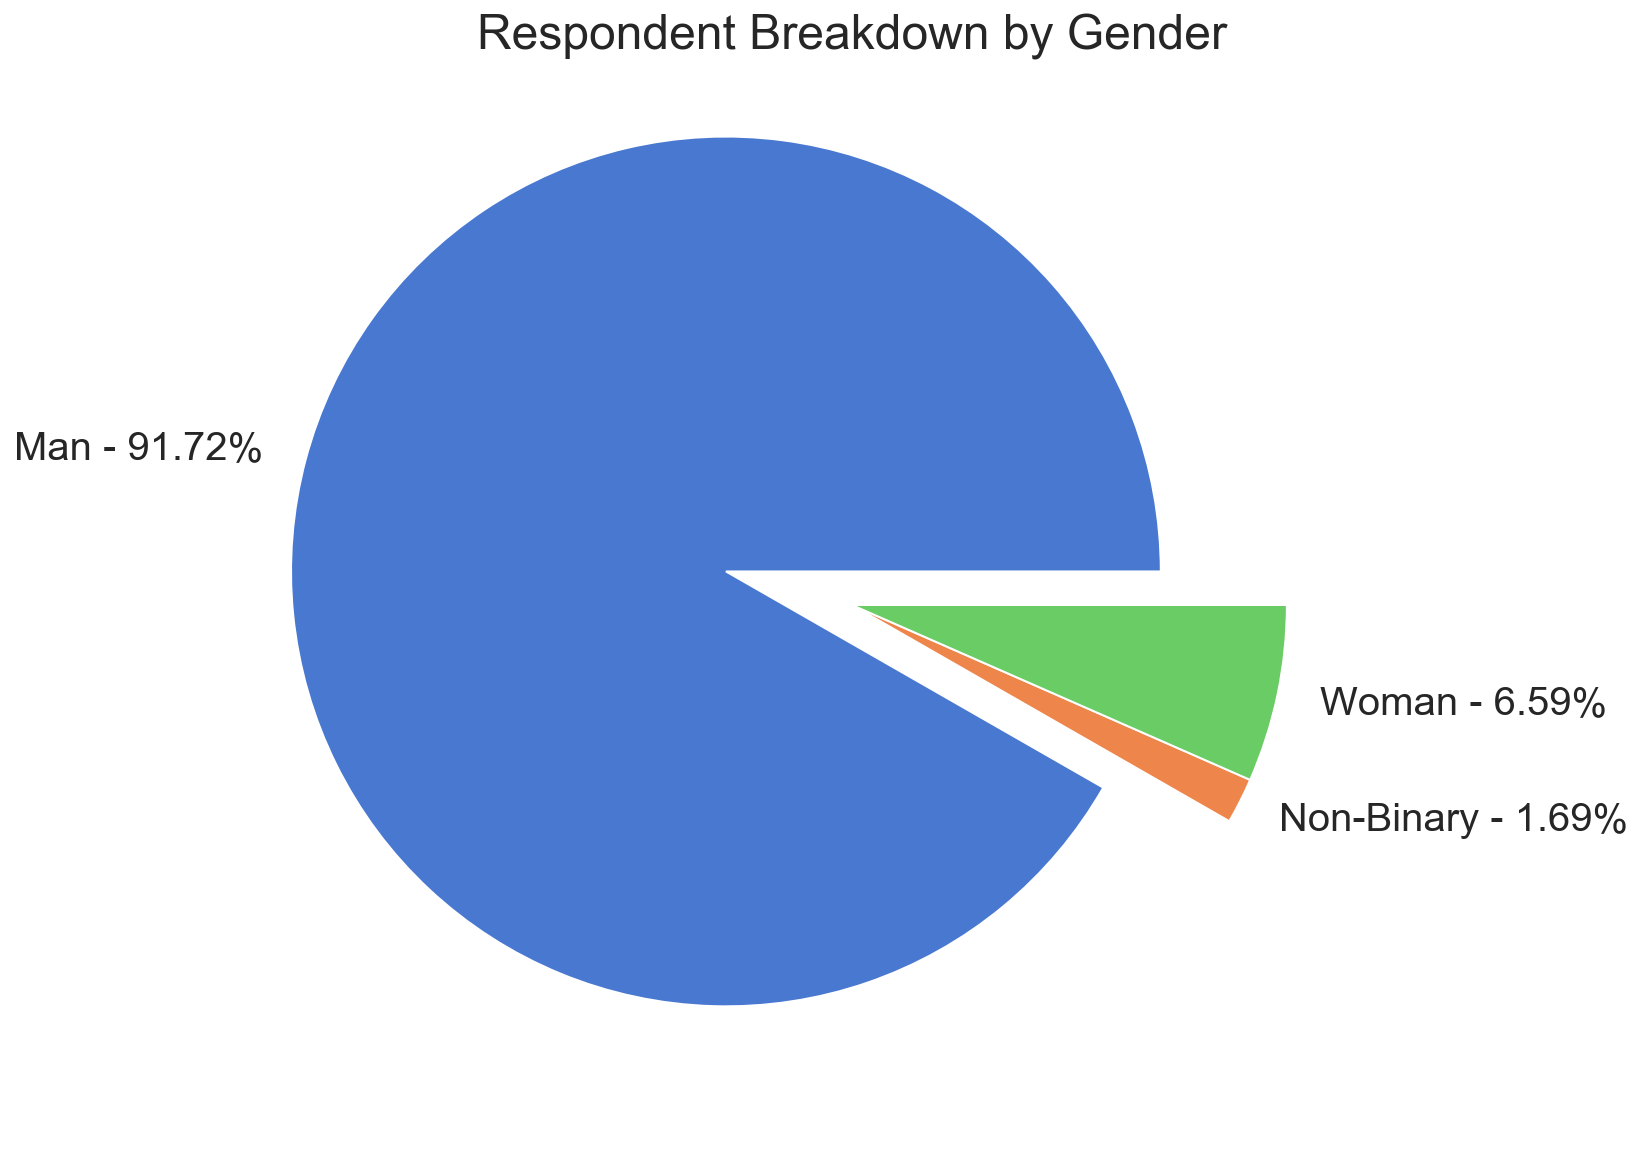

In [10]:
gender_group = survey_data.groupby('GenderReduced')['Respondent'].count().reset_index()

labels = gender_group['GenderReduced']
percentages = [f"{round((val / gender_group['Respondent'].sum()) * 100, 2)}%" for val in gender_group['Respondent']]
labels = [f"{label} - {percentage}" for label, percentage in zip(labels, percentages)]

explode = [.3 if x == 0 else 0 for x in range(len(gender_group['GenderReduced'].unique()))]

title = "Respondent Breakdown by Gender"
fig = plt.pie(x=gender_group['Respondent'], labels=labels, explode=explode)
plt.title(title)

plt.savefig(f"{plot_path}{title}.png", dpi=300)

### <a class="anchor" id="all_salaries_boxplot_exc_outliers">All Salaries Boxplot Excluding Outliers</a>

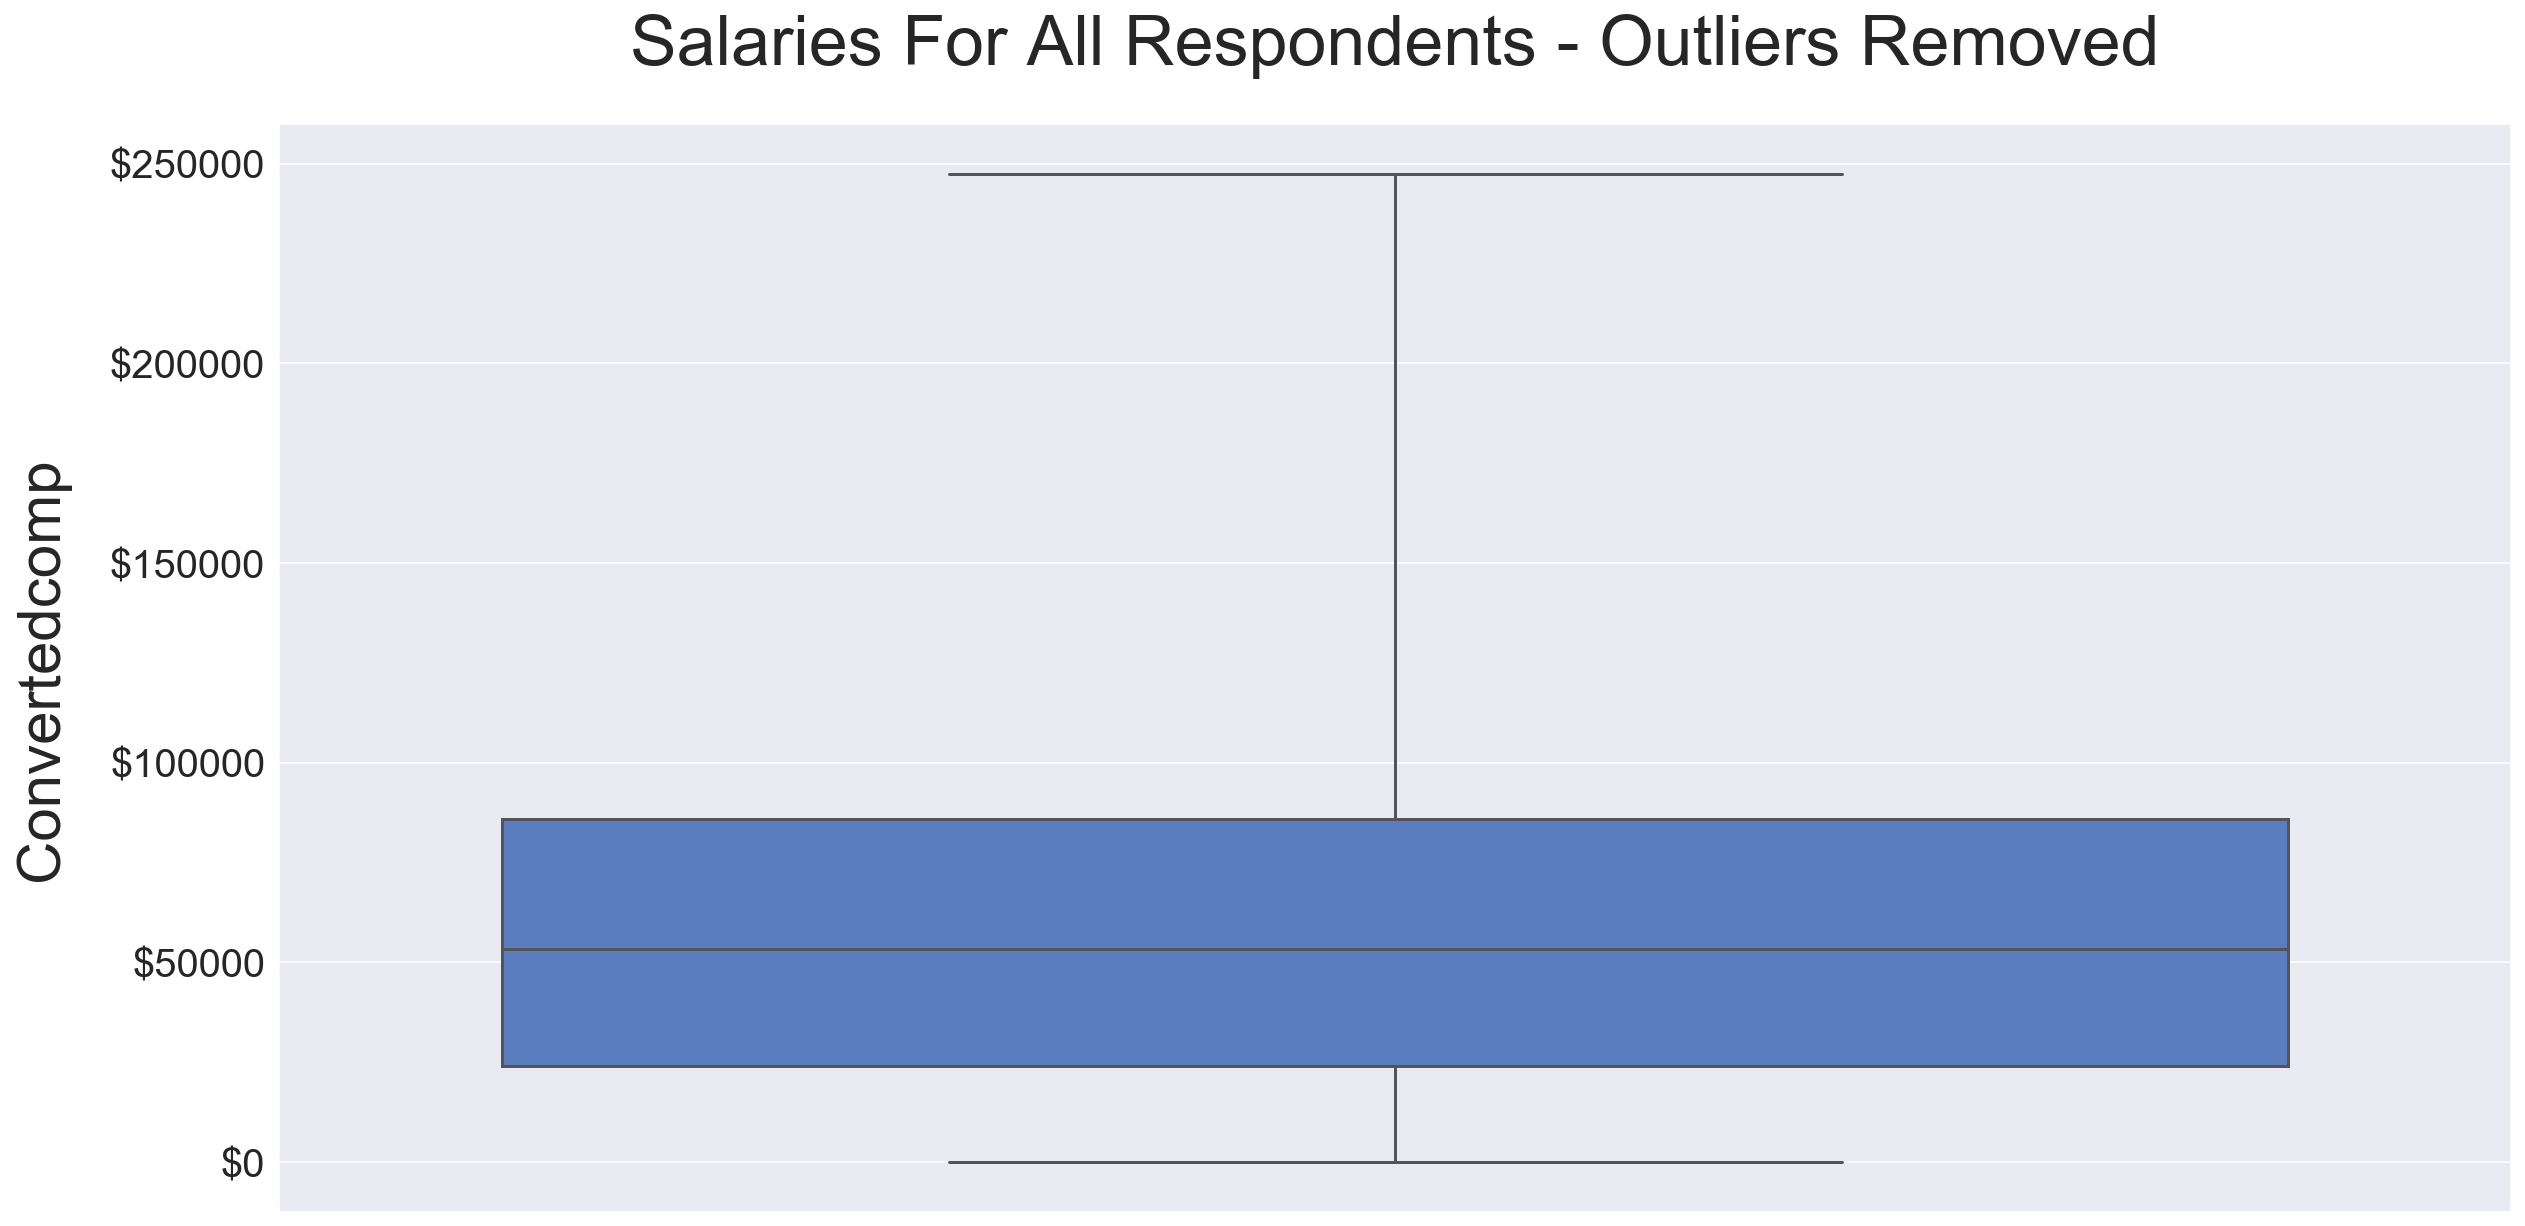

In [11]:
title = 'Salaries for all respondents - Outliers Removed'
fig = sns.boxplot(data=survey_data, y='ConvertedComp', whis=10.0)

format_plot(fig, title, y_axis_currency=True, hide_x=True)

### <a class="anchor" id="continent_comp_boxplot">Converted Comp By Continent Boxplot</a>

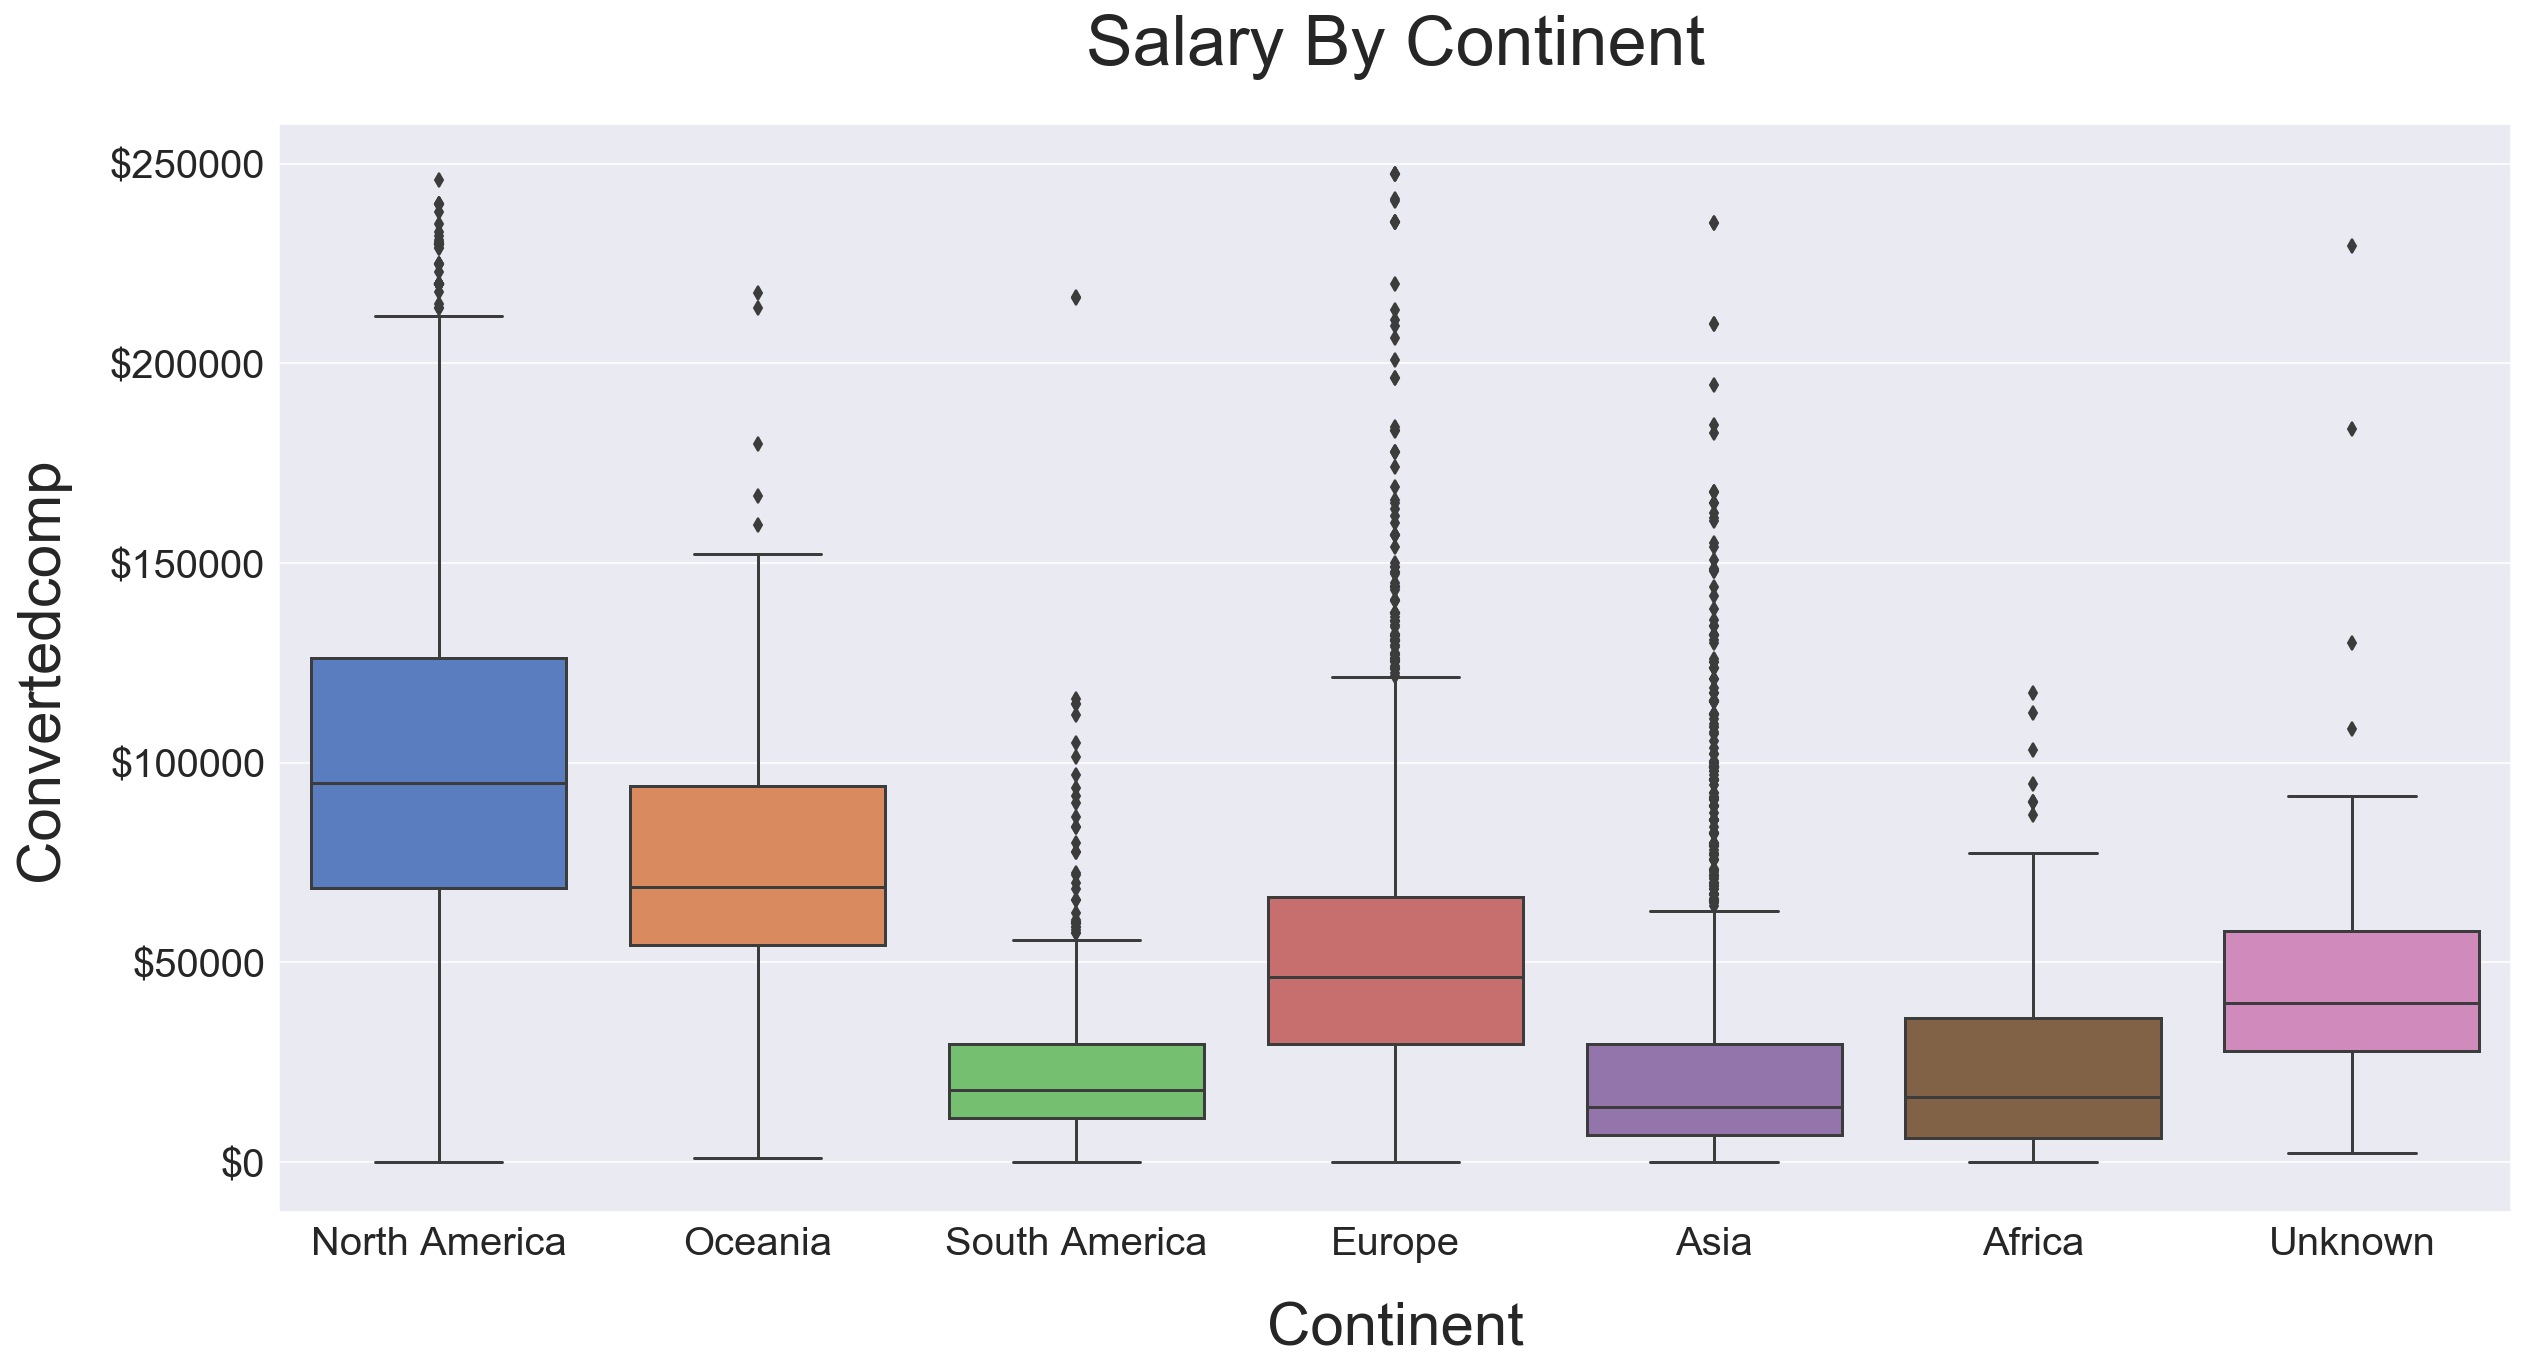

In [12]:
title = 'Salary by Continent'
fig = sns.boxplot(x=survey_data.Continent, y=survey_data.ConvertedComp)

format_plot(fig, title, y_axis_currency=True)

### <a class="anchor" id="global_correlation">Correlation Strength Globally</a>

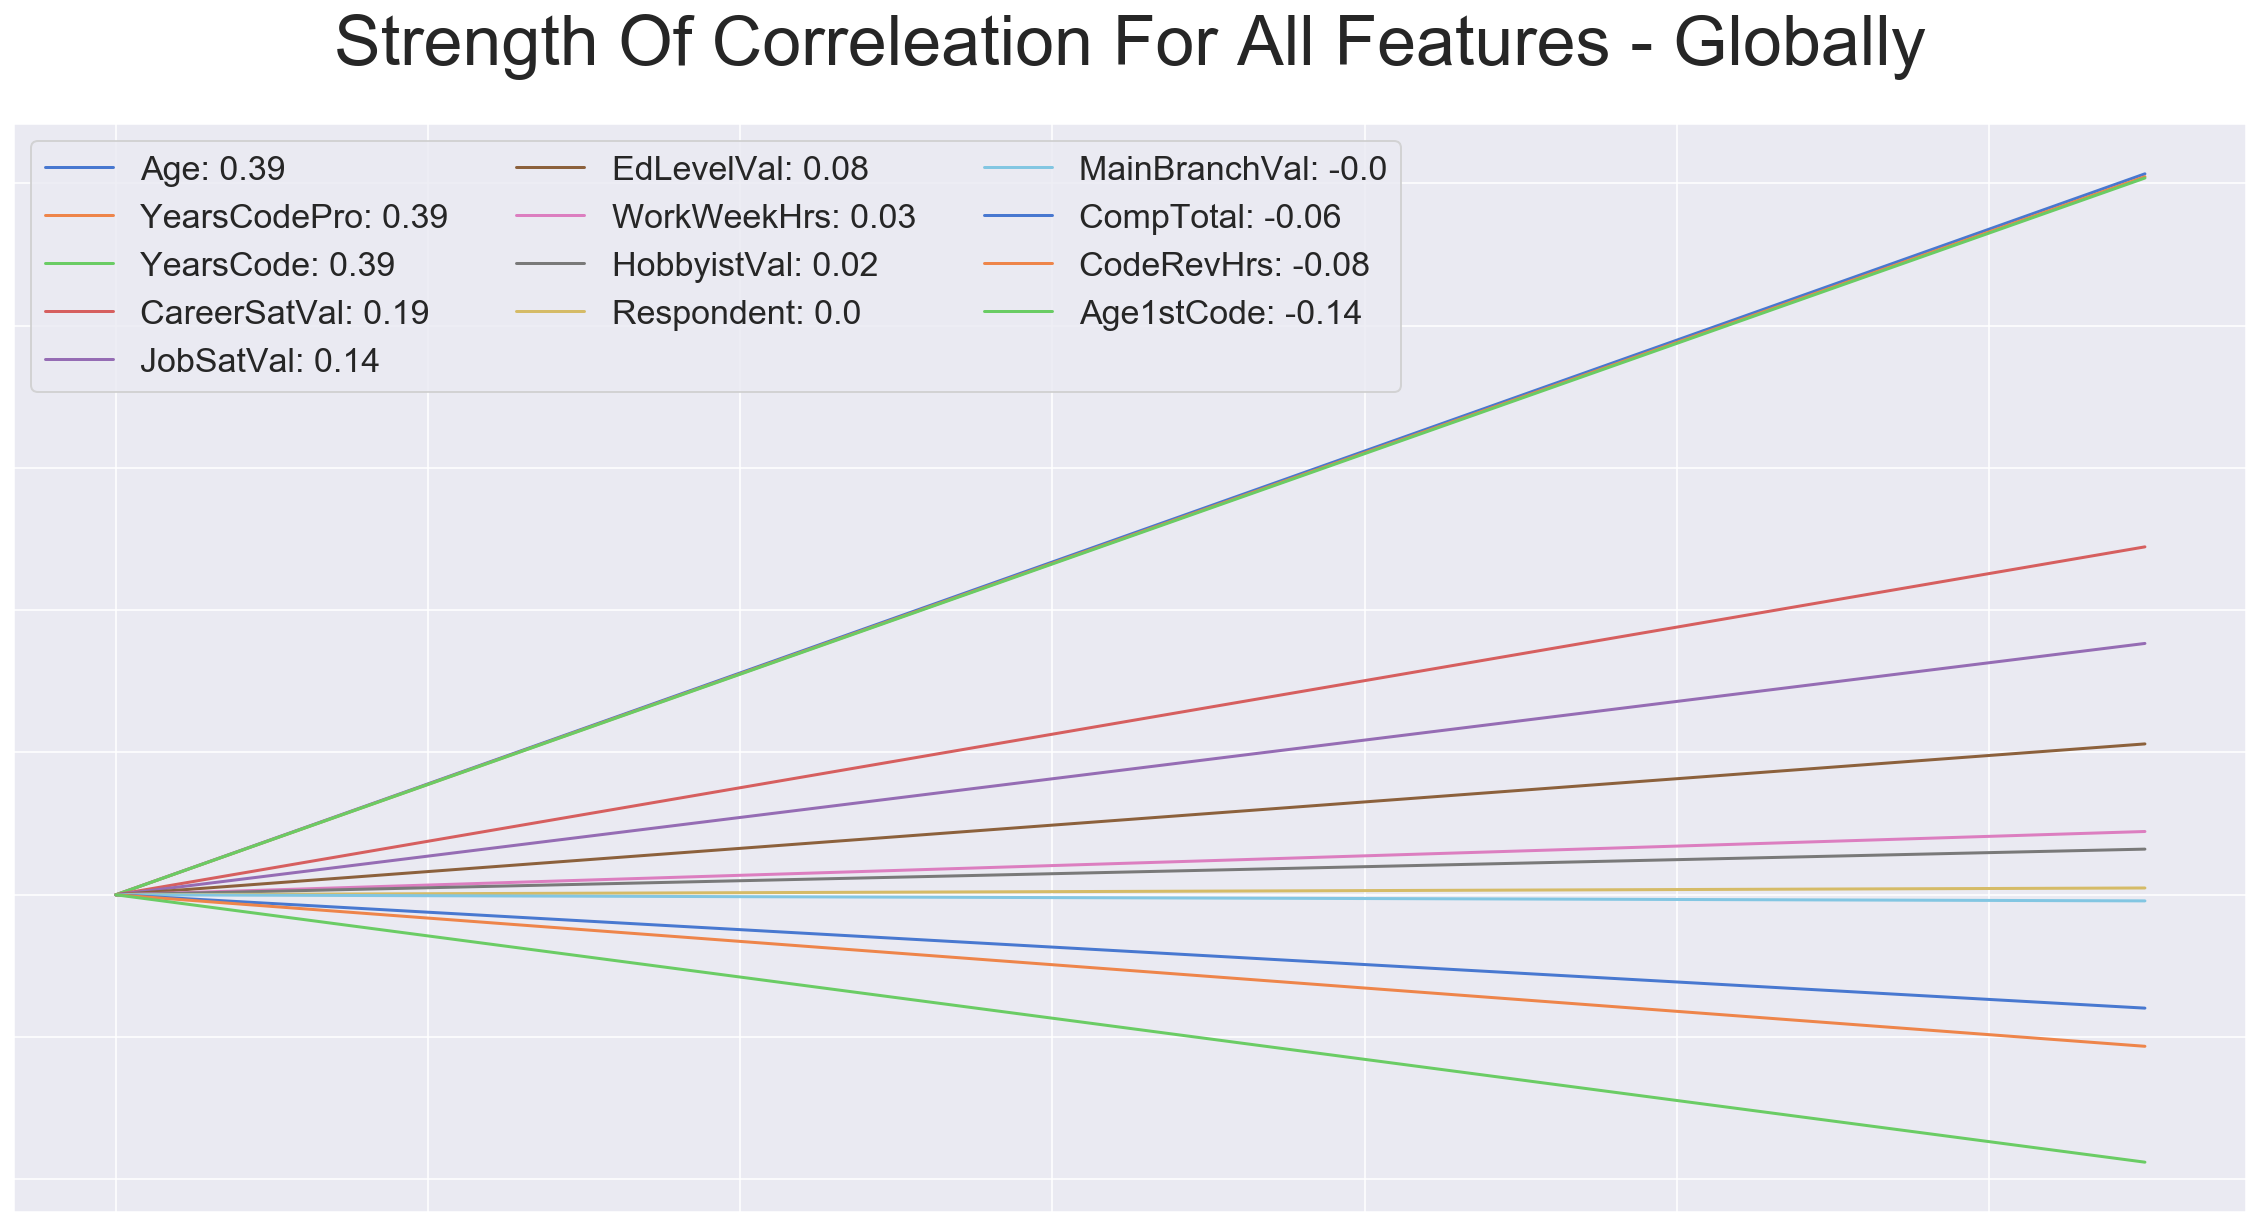

In [13]:
all_correlation = survey_data.corr()['ConvertedComp'].reset_index().sort_values('ConvertedComp', ascending=False)
# m is the slope
# y = m * x + c 

fig = plt.subplot()
title = 'Strength of Correleation for all Features - Globally'
for slope, label in zip(all_correlation['ConvertedComp'][1:], all_correlation['index'][1:]):

    label = f"{label}: {round(slope, 2)}"
    x = np.linspace(0, 13, 13)
    y = slope * x + 1
    
    fig = sns.lineplot(x=x, y=y, label=label)
    
fig.legend(ncol=3, fontsize=17)

format_plot(fig, title, hide_x=True, hide_y=True)


### <a class="anchor" id="country_correlation">Correlation Strength by Country</a>

In [14]:
countries = survey_data.Country.unique()

correleation_dataframe = pd.DataFrame()

for country in countries:
    ignore_list = ['ConvertedComp', 'CompTotal']

    data = survey_data[survey_data['Country'] == country]
    if len(data) < 100:
        pass
    else:
        corr_data = data.corr()
        corr_data['Country'] = country
        corr_data = corr_data[['ConvertedComp', 'Country']].reset_index()
        corr_data = corr_data[~corr_data['index'].isin(ignore_list)] 
        correleation_dataframe = correleation_dataframe.append(corr_data)




correleation_dataframe = correleation_dataframe.rename(columns={'index':'feature', 'ConvertedComp':'Correlation'})
correleation_dataframe.reset_index(inplace=True)
correleation_dataframe.drop(columns='index', inplace=True)
correleation_dataframe.sort_values('Correlation', ascending=False, inplace=True)
correleation_dataframe = correleation_dataframe[(correleation_dataframe['Correlation'] < float(1)) & (correleation_dataframe['Correlation'] > float(-1))]

### <a class="anchor" id="top_correlation">Top Correlating Features</a>

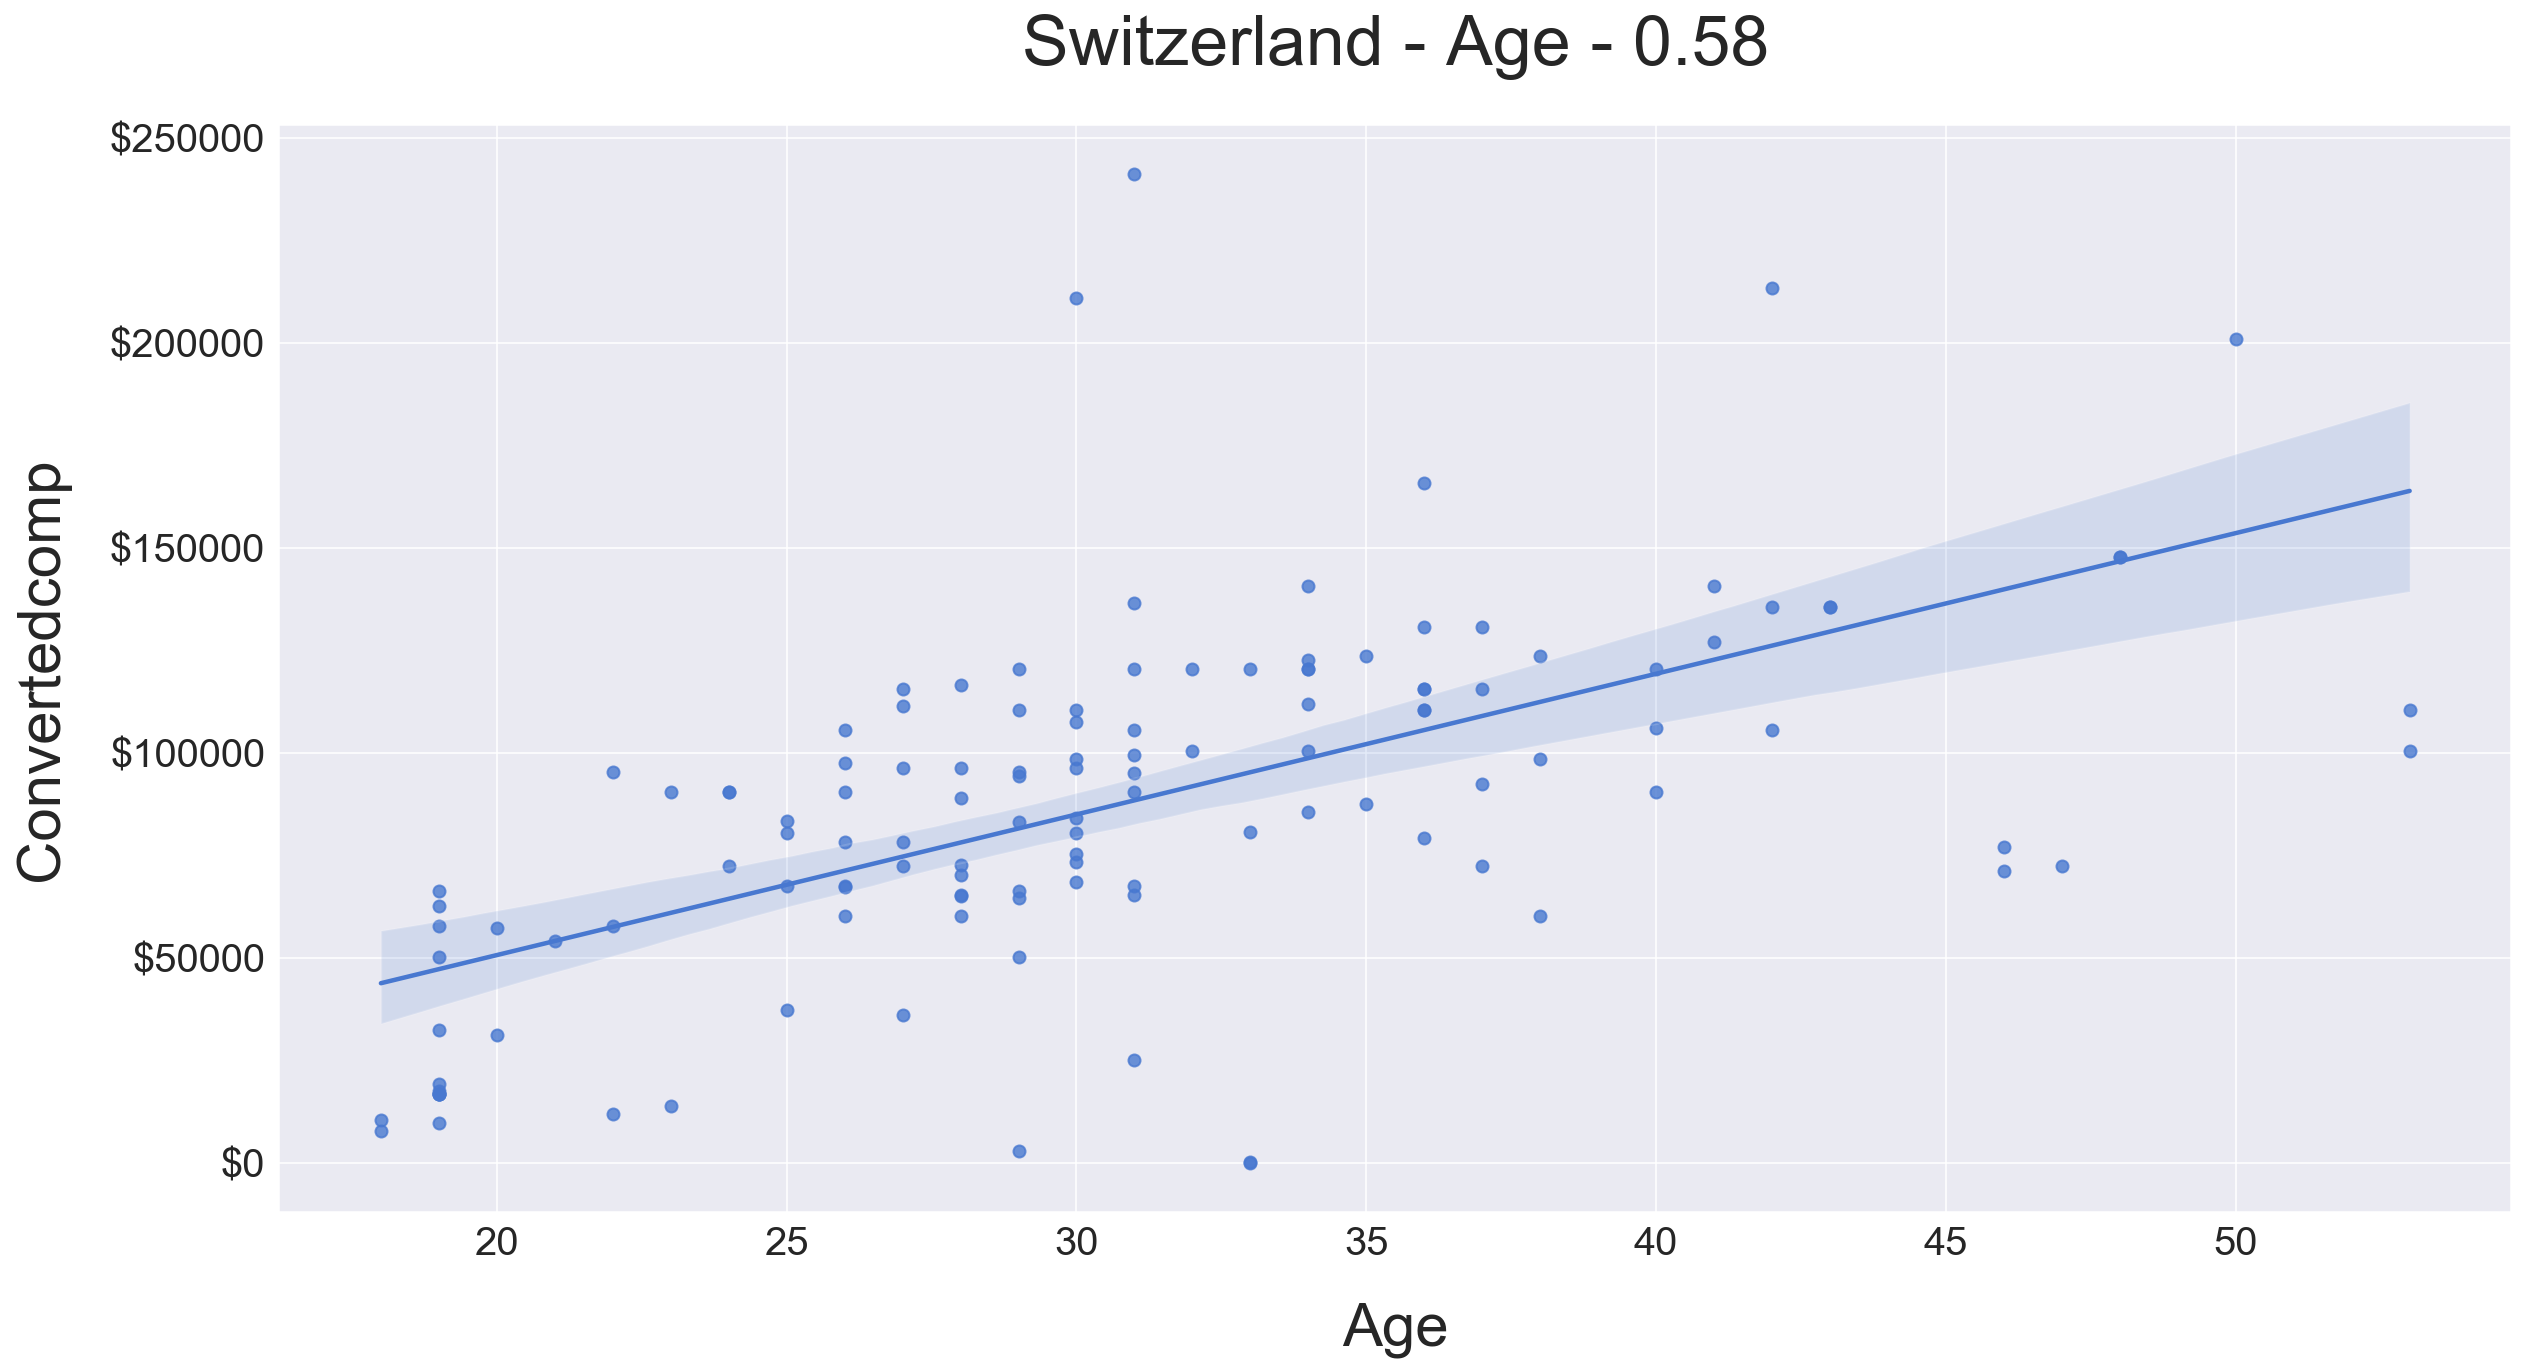

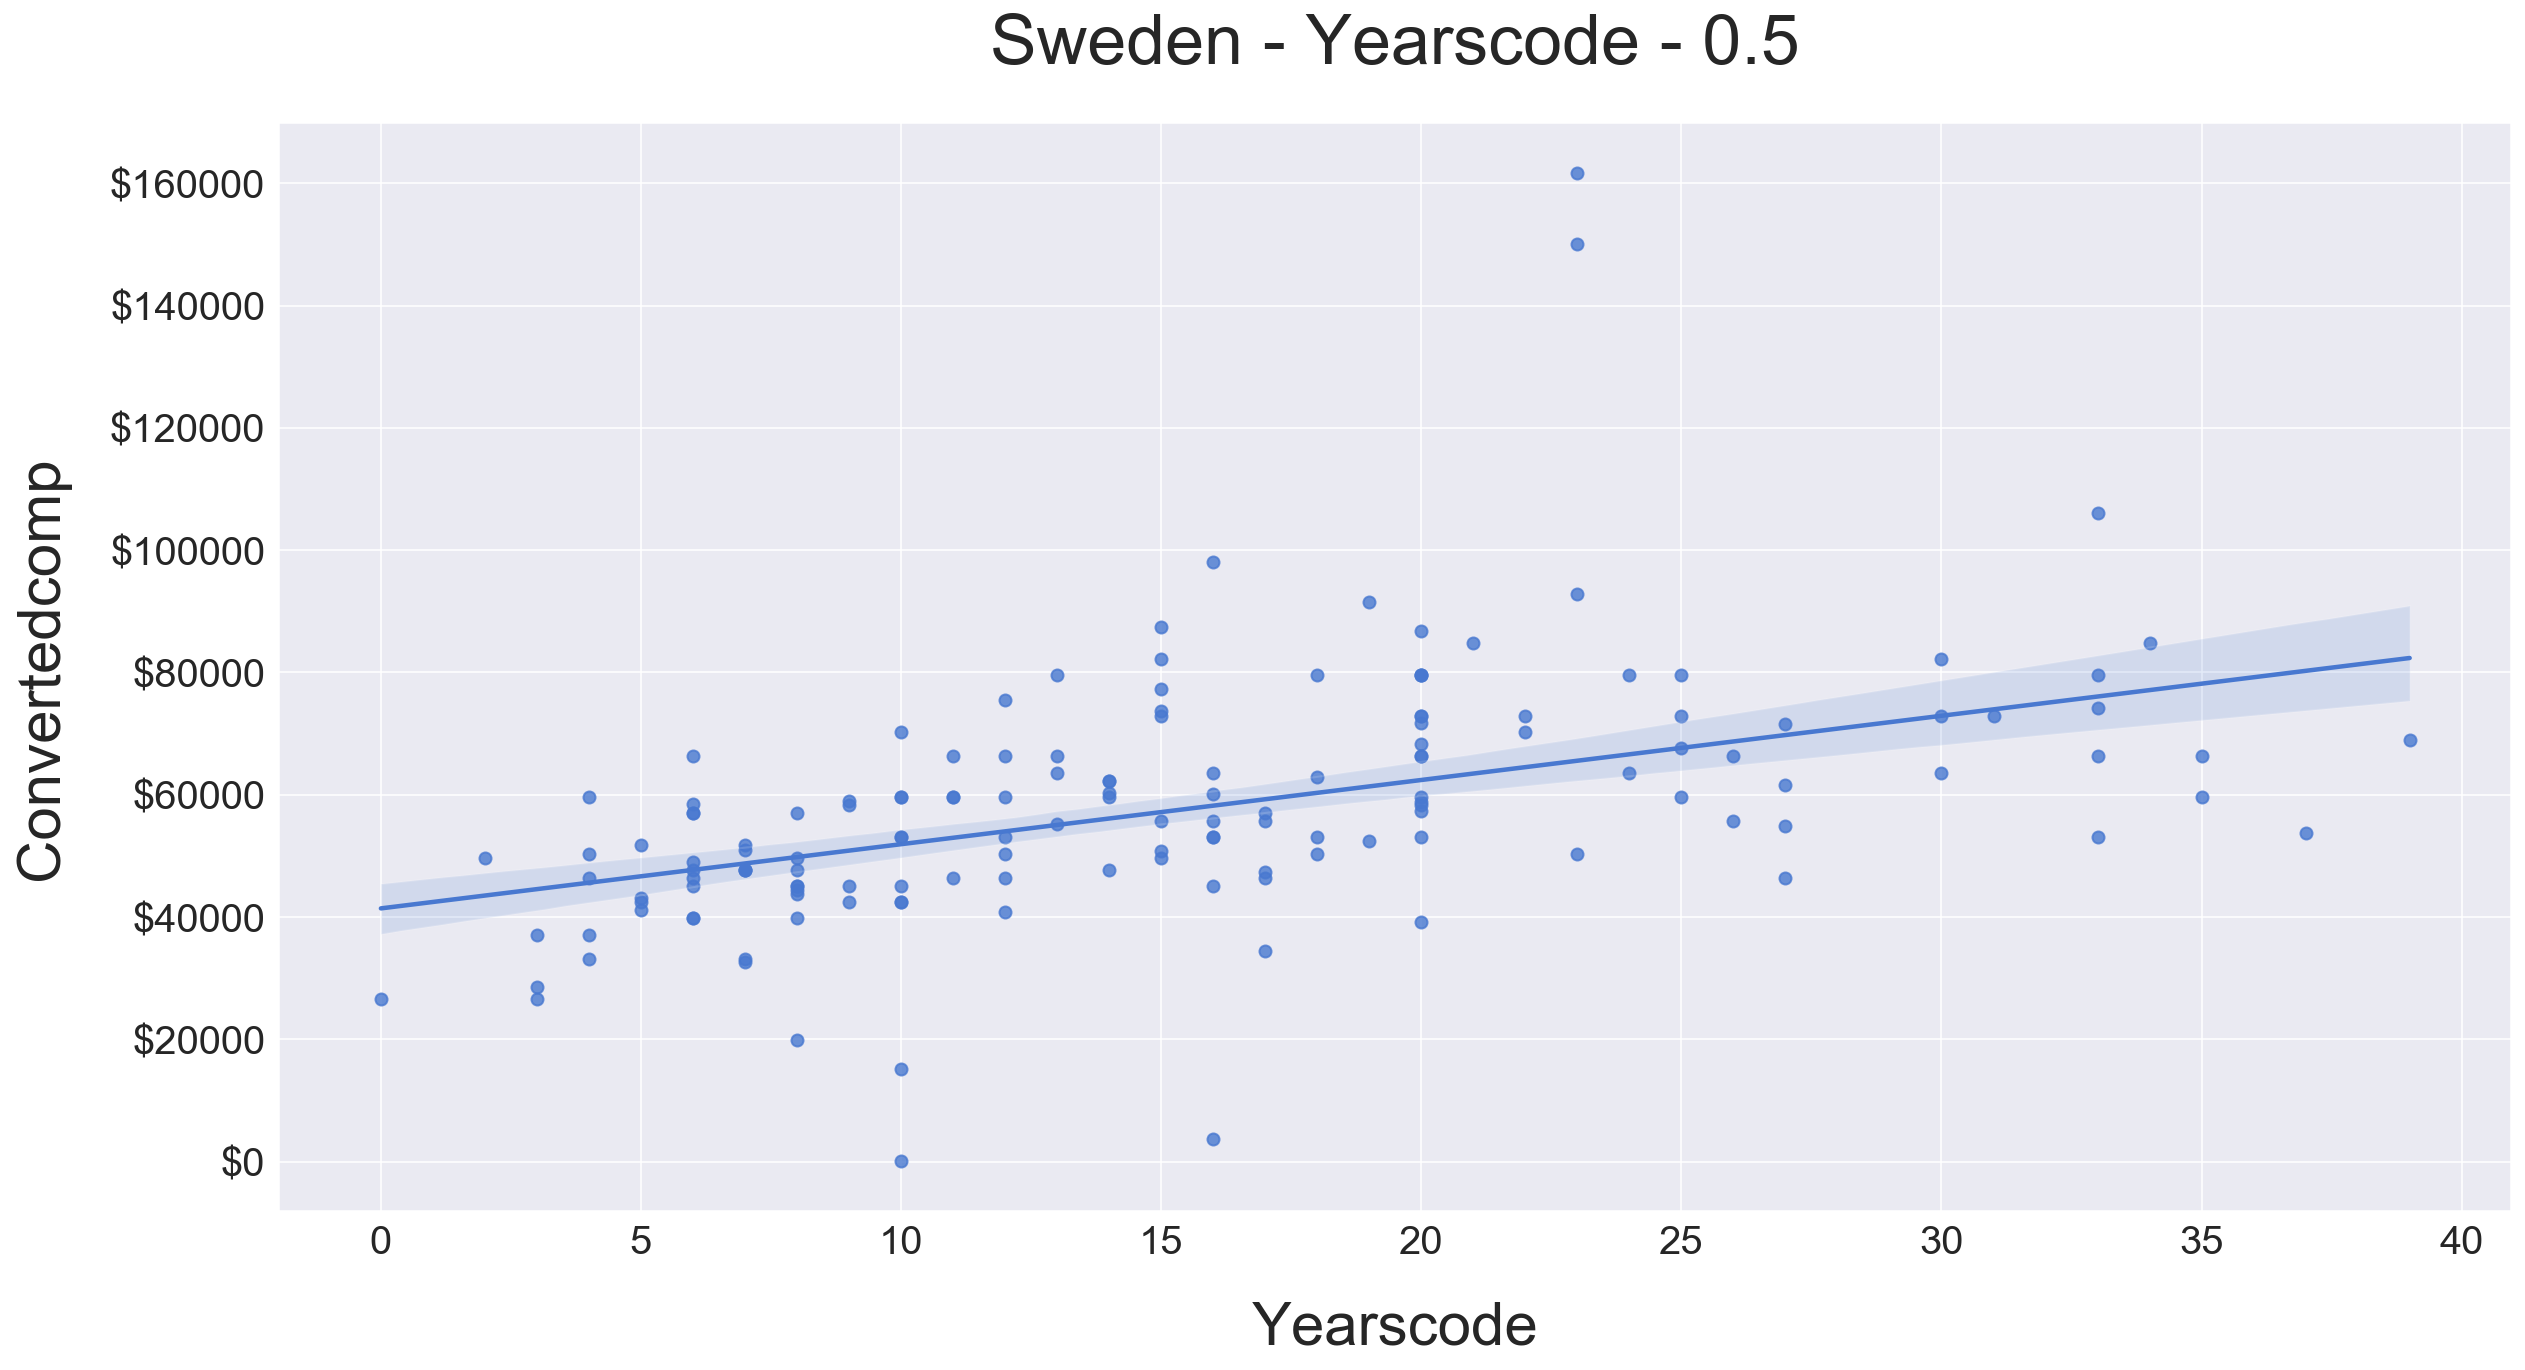

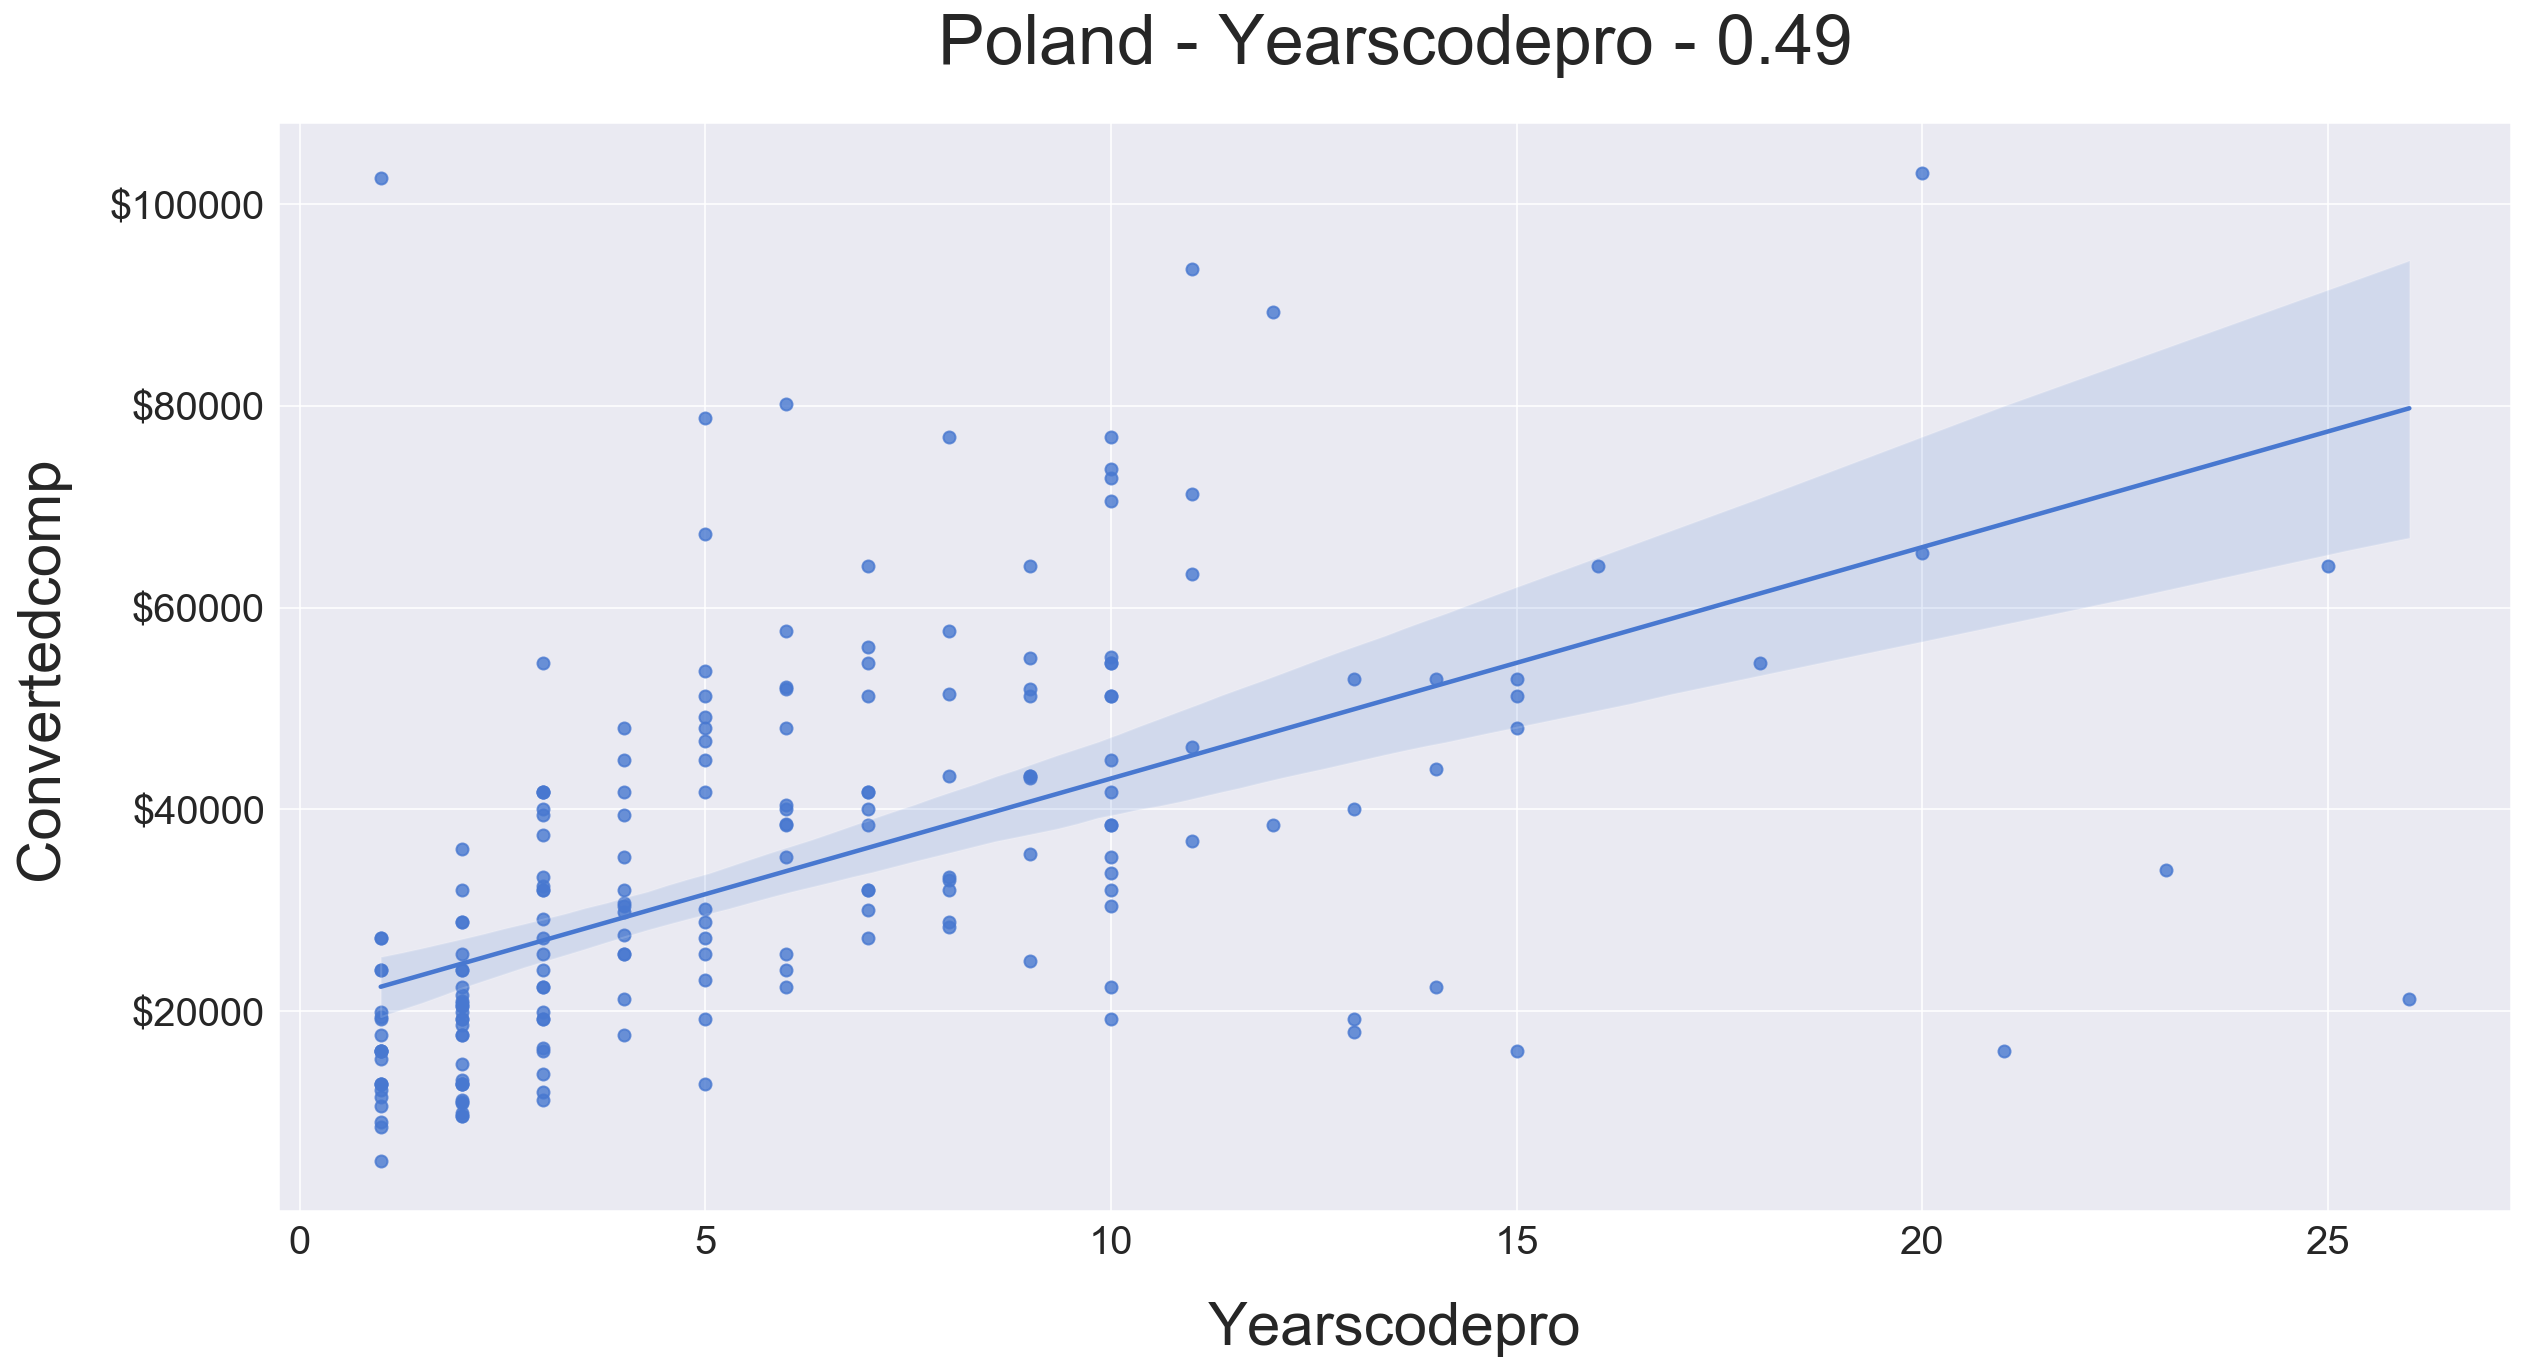

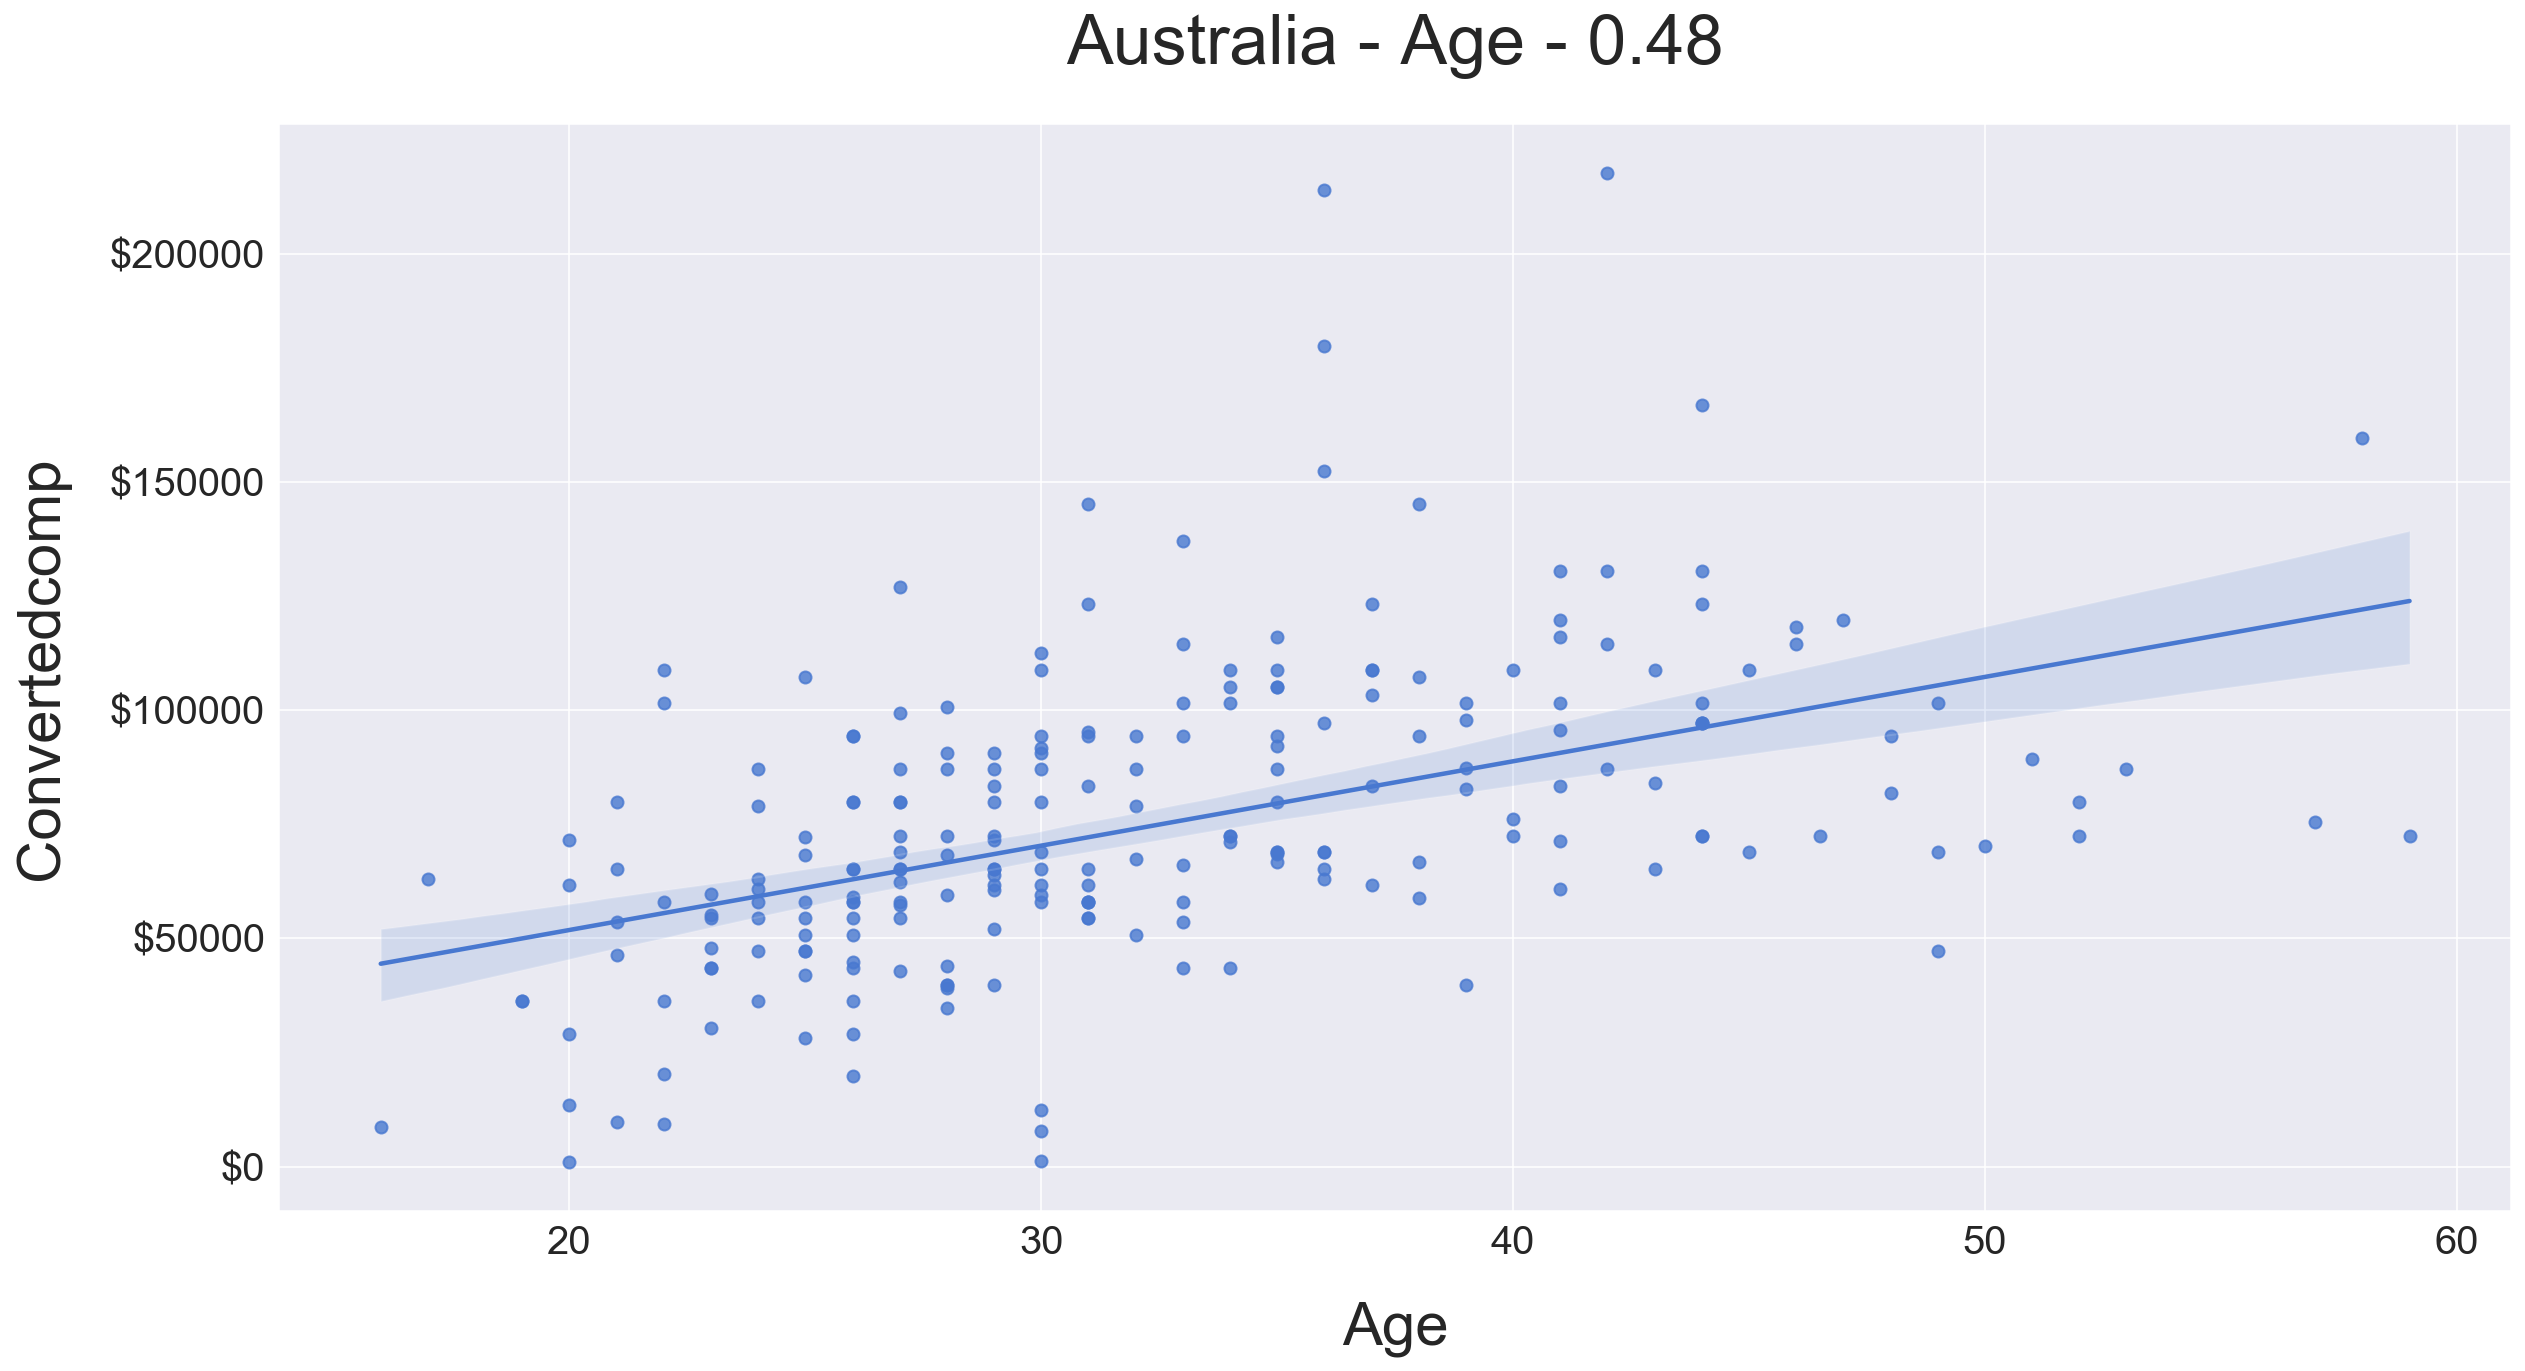

<Figure size 1440x720 with 0 Axes>

In [15]:
best_corr_per_country = pd.DataFrame()

for country in countries:


    data = correleation_dataframe[correleation_dataframe['Country'] == country]
    if len(data) > 0:
        data = data.iloc[:5]
        best_corr_per_country = best_corr_per_country.append(data)
    else:
        data['Country'] = country
        data['feature'] = 'None Found'
        data['Correlation'] = 0
        
    
best_corr_per_country = best_corr_per_country.sort_values('Correlation', ascending=False)
        
best_countries = best_corr_per_country['Country'].unique()

for country in best_countries[:4]:
    
    data = survey_data[survey_data['Country'] == country]
    feature = best_corr_per_country[best_corr_per_country['Country'] == country]['feature'].values[0]
    corr_score = best_corr_per_country[best_corr_per_country['Country'] == country]['Correlation'].values[0]

    title = f'{country} - {feature} - {round(corr_score, 2)}'
    
    fig = sns.regplot(data=data, x=feature, y='ConvertedComp', robust=True, x_ci=.95)
    format_plot(fig, title, y_axis_currency=True)  
    plt.clf()

### <a class="anchor" id="top_5_correlation"> Frequency of Top 5 Features for Each Country</a>

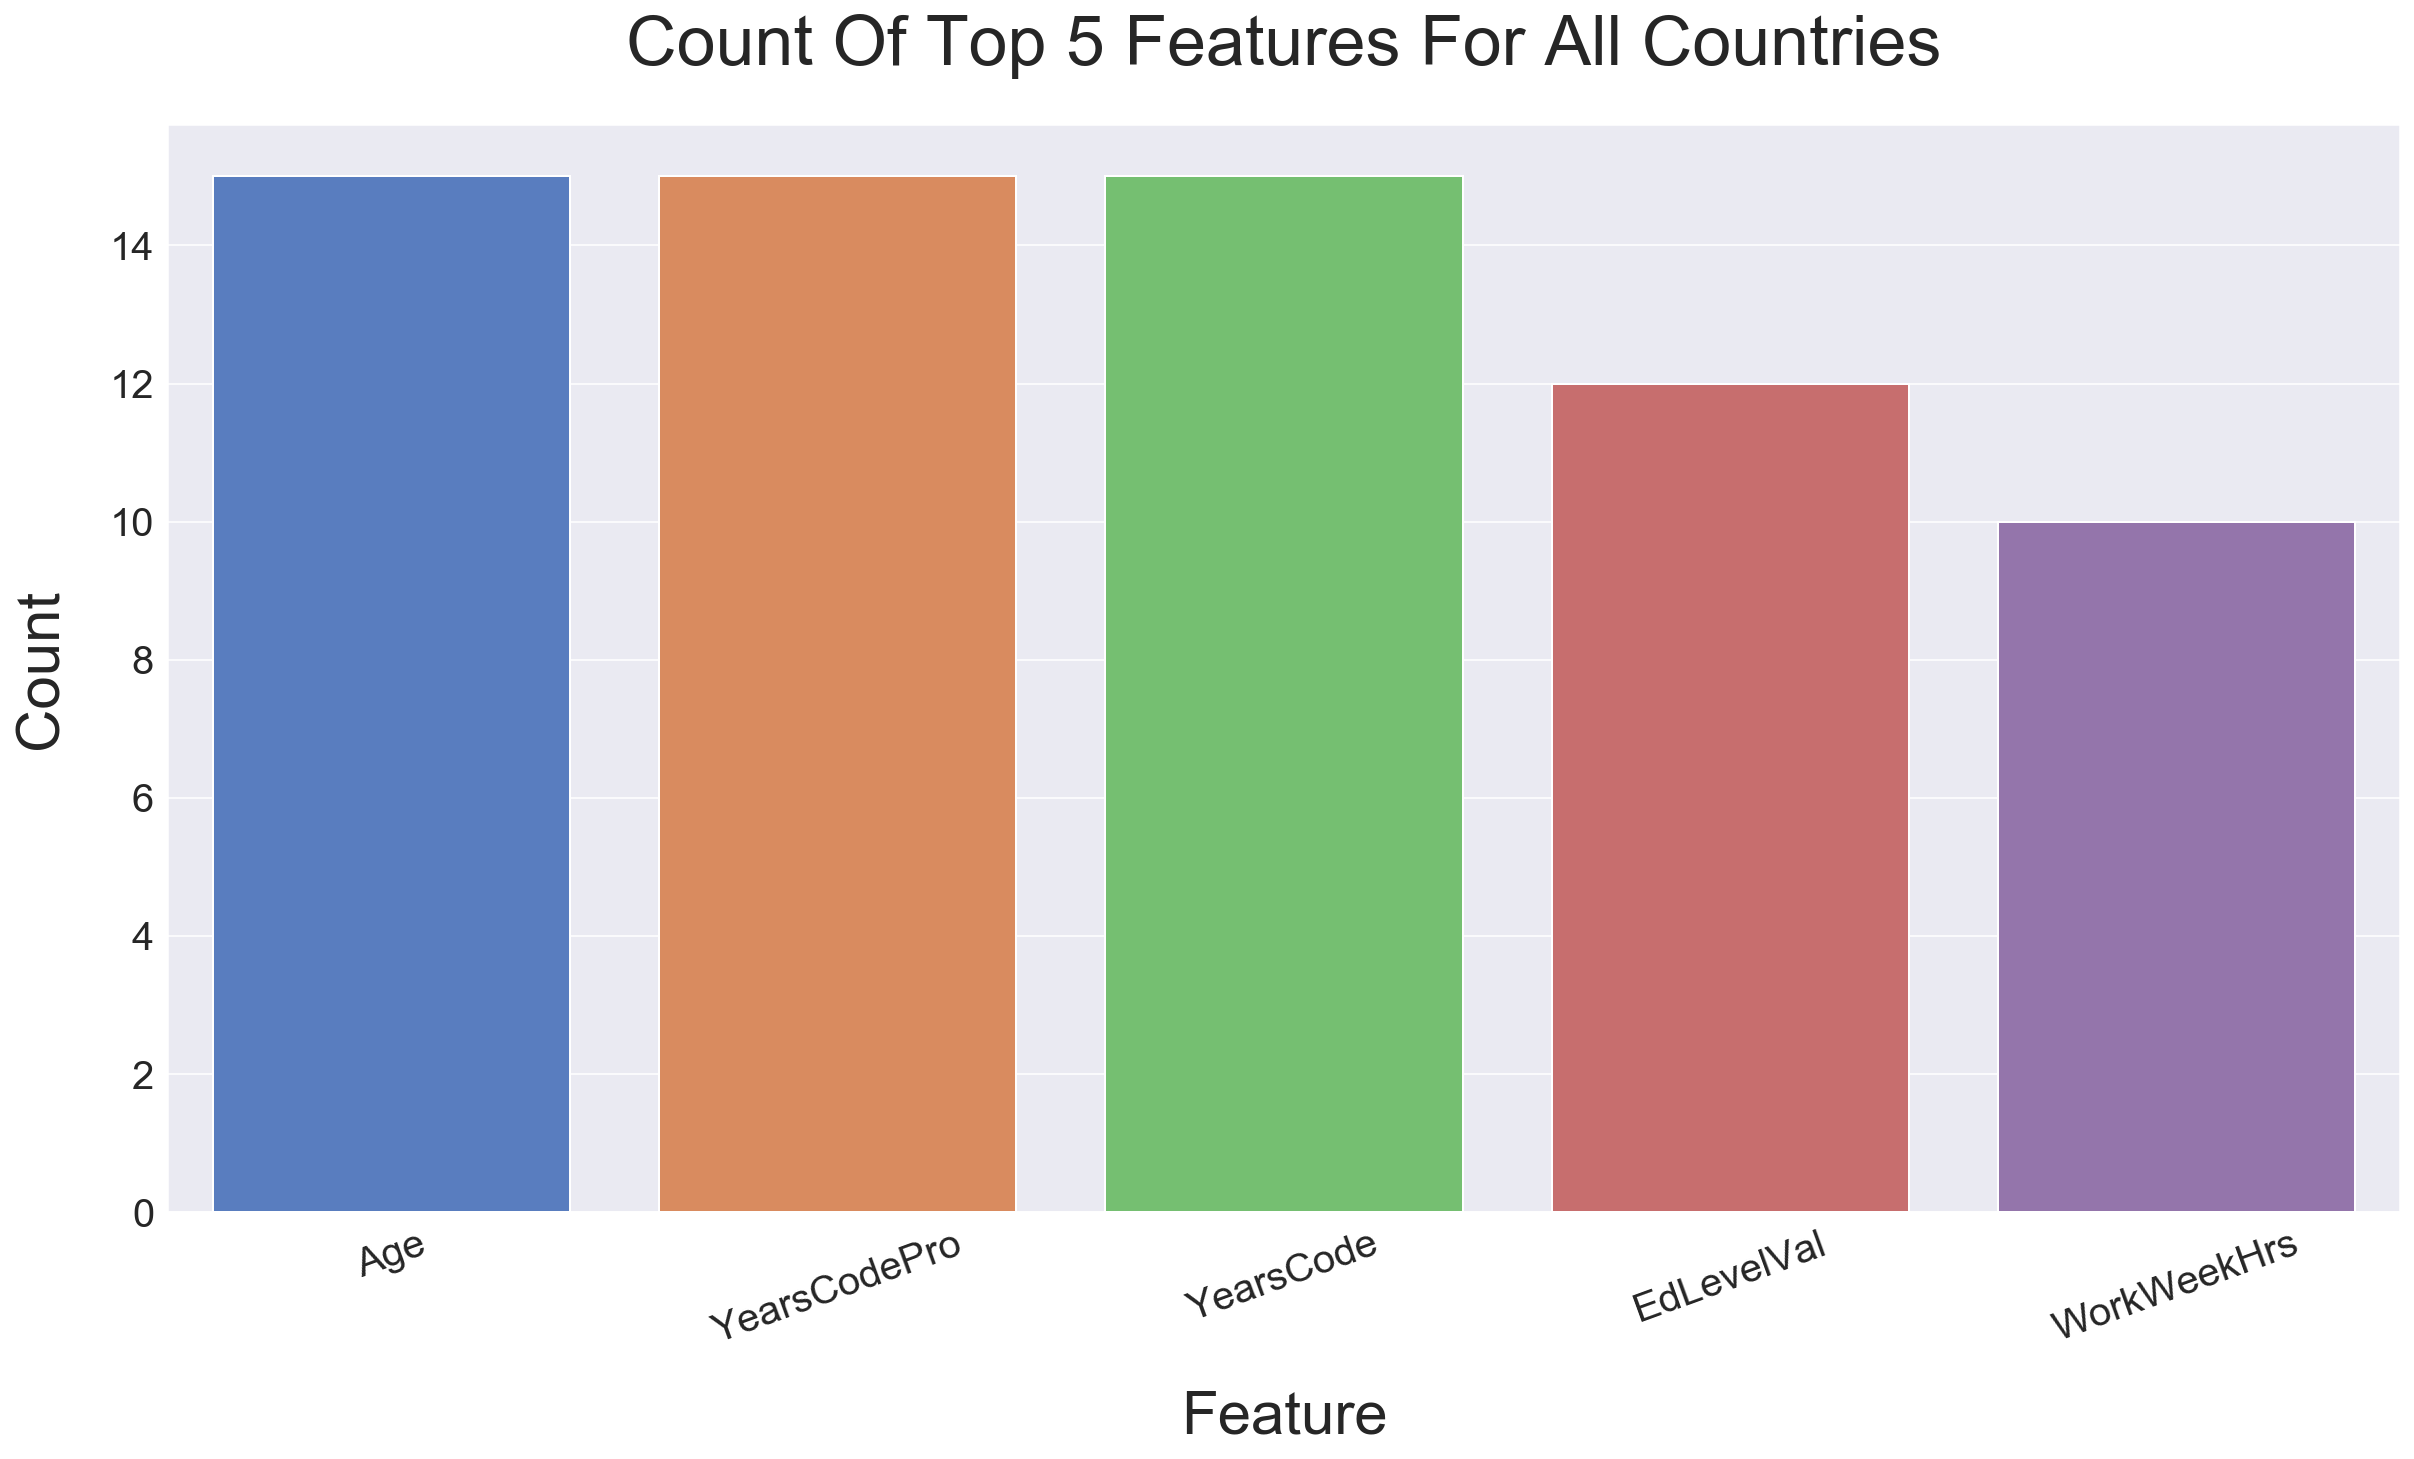

In [16]:
feature_count = best_corr_per_country['feature'].value_counts().to_frame()[:5]
feature_count.reset_index(inplace=True)
feature_count.rename(columns={'index': 'Feature', 'feature':'Count'}, inplace=True)

title = 'Count of Top 5 Features for All Countries'
fig = sns.barplot(data=feature_count, x='Feature', y='Count')
fig.set_xticklabels(fig.get_xticklabels(), rotation=20)
format_plot(fig, title)



### <a class="anchor" id="extraversion_salary_effect">Extraversion effect on salary</a>

In [17]:
for country in survey_data.Country.unique():

    extraversion_group = survey_data[survey_data['Country'] == country].groupby('Extraversion')['ConvertedComp'].median()
#     print (country)
#     print (extraversion_group.describe())
#     print ('*****')


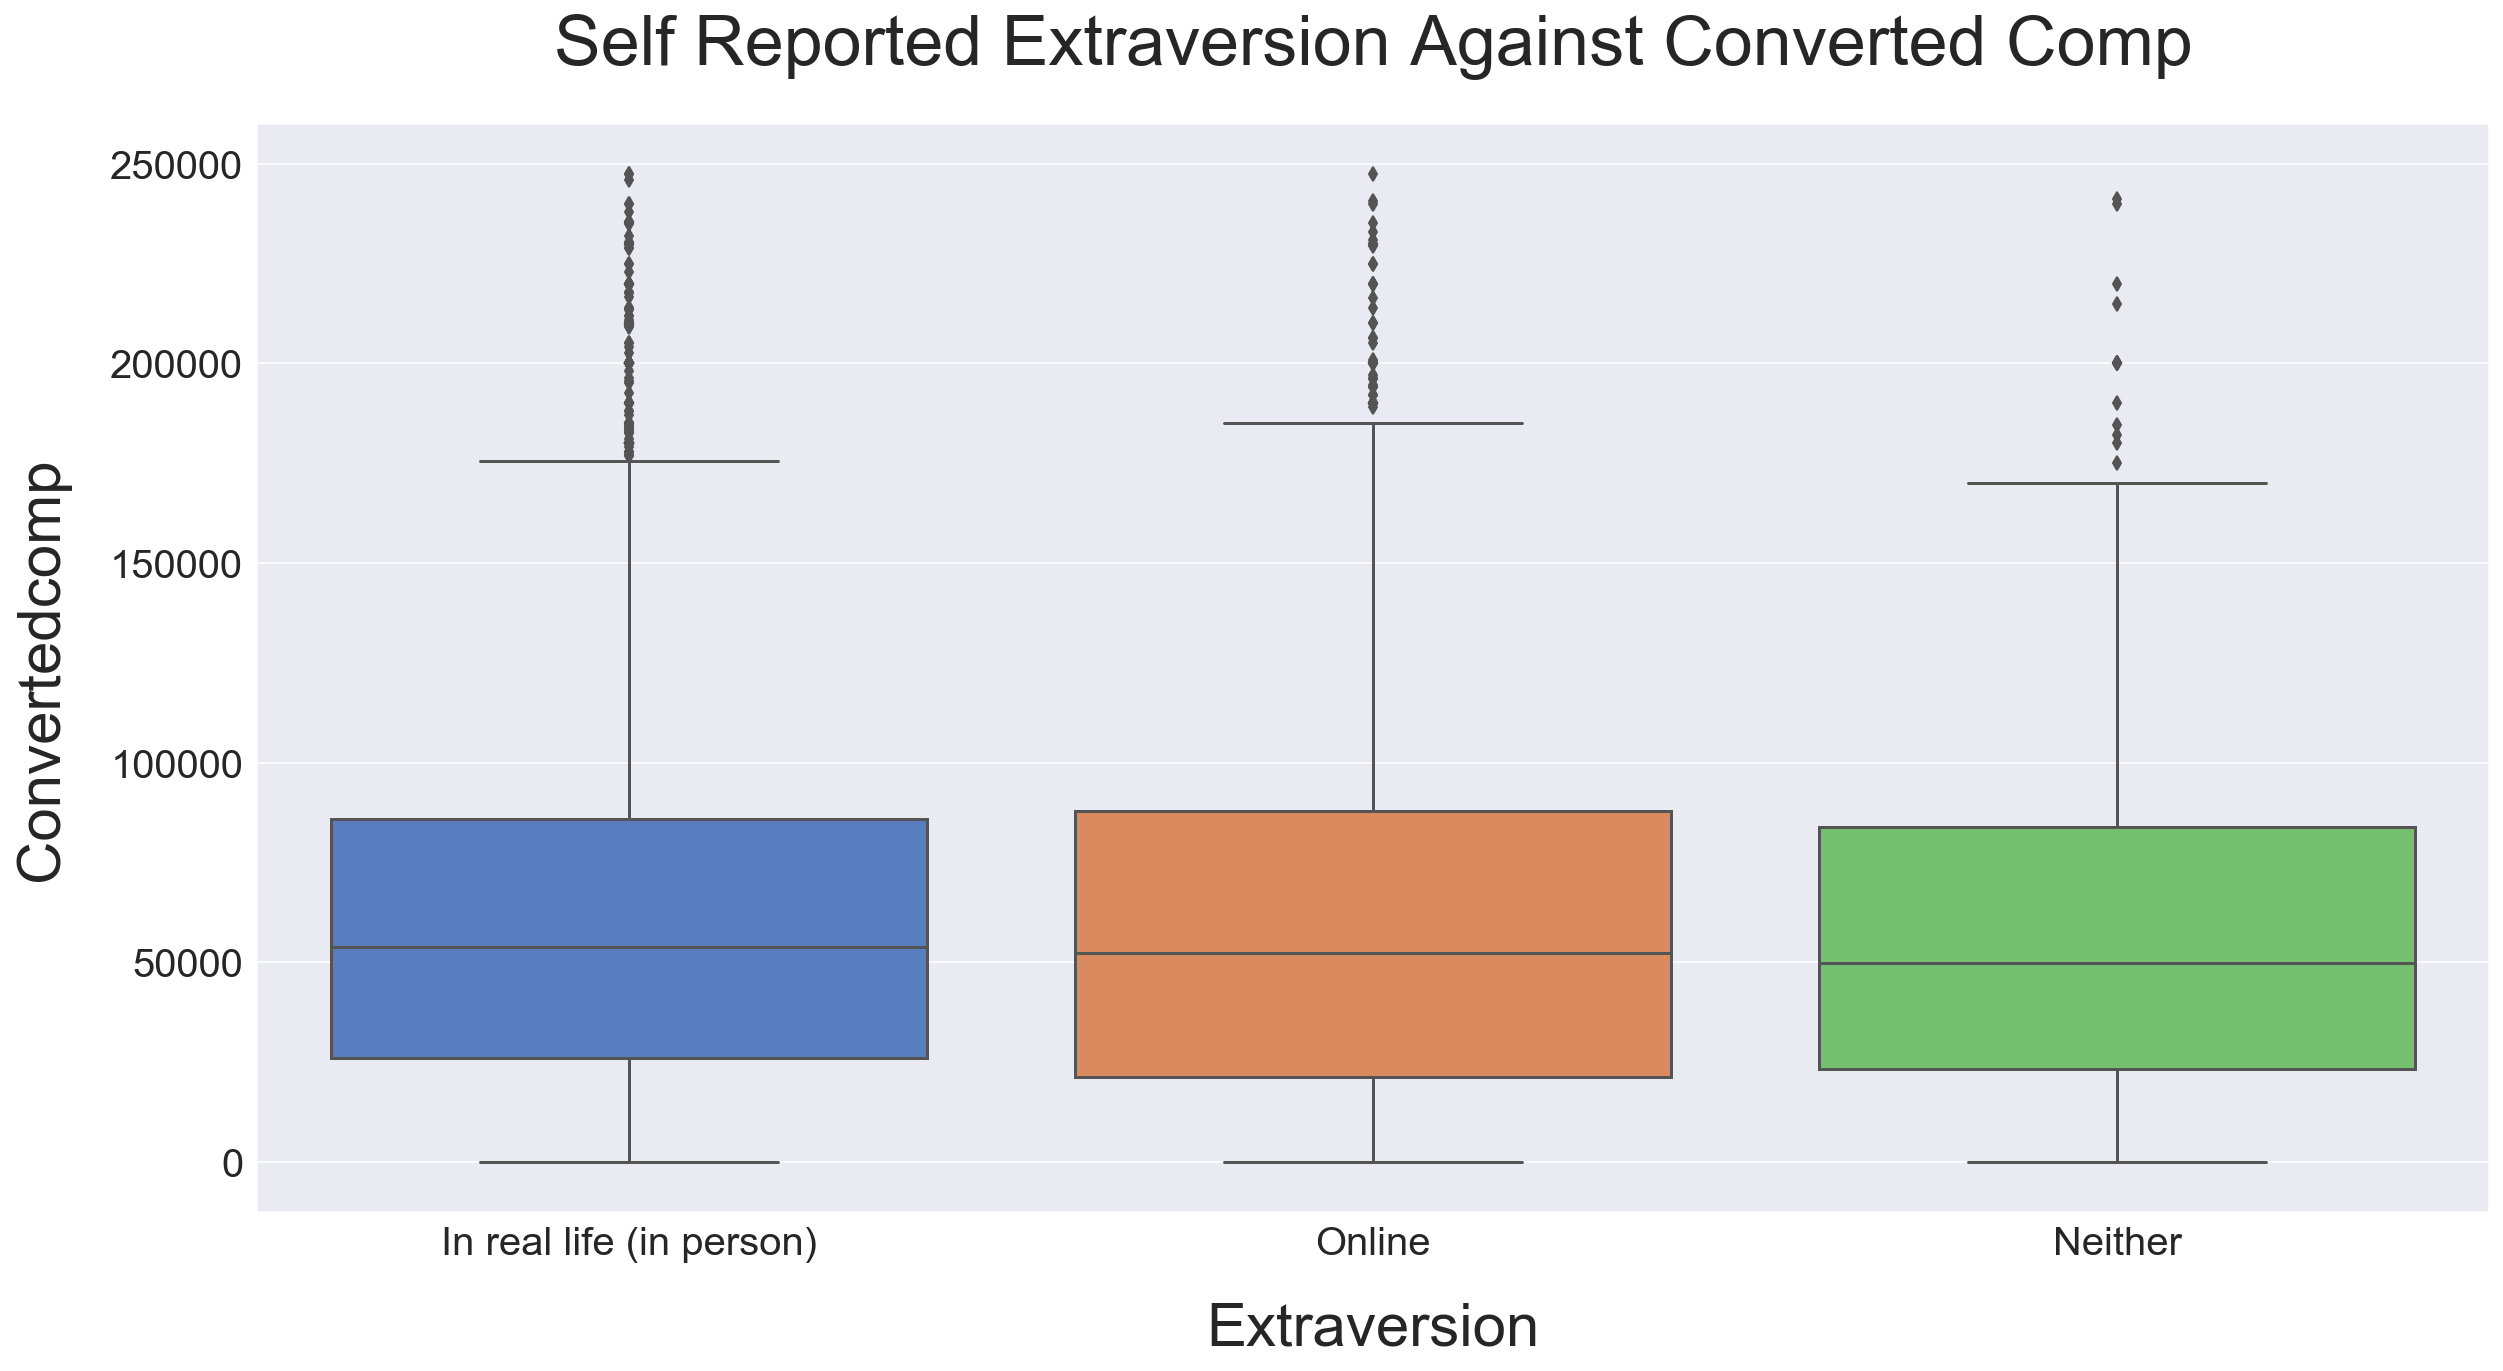

In [18]:
extraversion_group = survey_data.groupby('Extraversion')['ConvertedComp'].median()
extraversion_group = extraversion_group.reset_index()
extraversion_group

title = "Self Reported Extraversion against Converted Comp"

fig = sns.boxplot(data=survey_data, x='Extraversion', y='ConvertedComp')
format_plot(fig, title)

### <a class="anchor" id="plot_tech_counts_function">Plot Tech Count Functions</a>

In [19]:
def count_and_plot_top_n_tech(tech_info_list, top_n, name='Tech'):
    tech_count = pd.DataFrame().from_dict(Counter(tech_info_list), orient='index').rename(columns={0:name})
    column_name = tech_count.columns[0]
    tech_count = tech_count.sort_values(column_name, ascending=False)[:top_n]
    
    title = f'Top {top_n} {column_name}'

    fig = sns.barplot(data=tech_count, x=tech_count.index, y=tech_count[column_name])

    format_plot(fig, title)
    return fig

### <a class="anchor" id="current_desired_language">Current and Desired Language Counts</a>

In [20]:
current_language_list, desired_langauge_list = count_tech_function('LanguageWorkedWith', 'LanguageDesireNextYear')

### <a class="anchor" id="top_n_language_worked_with">Top N Languages Worked With</a>

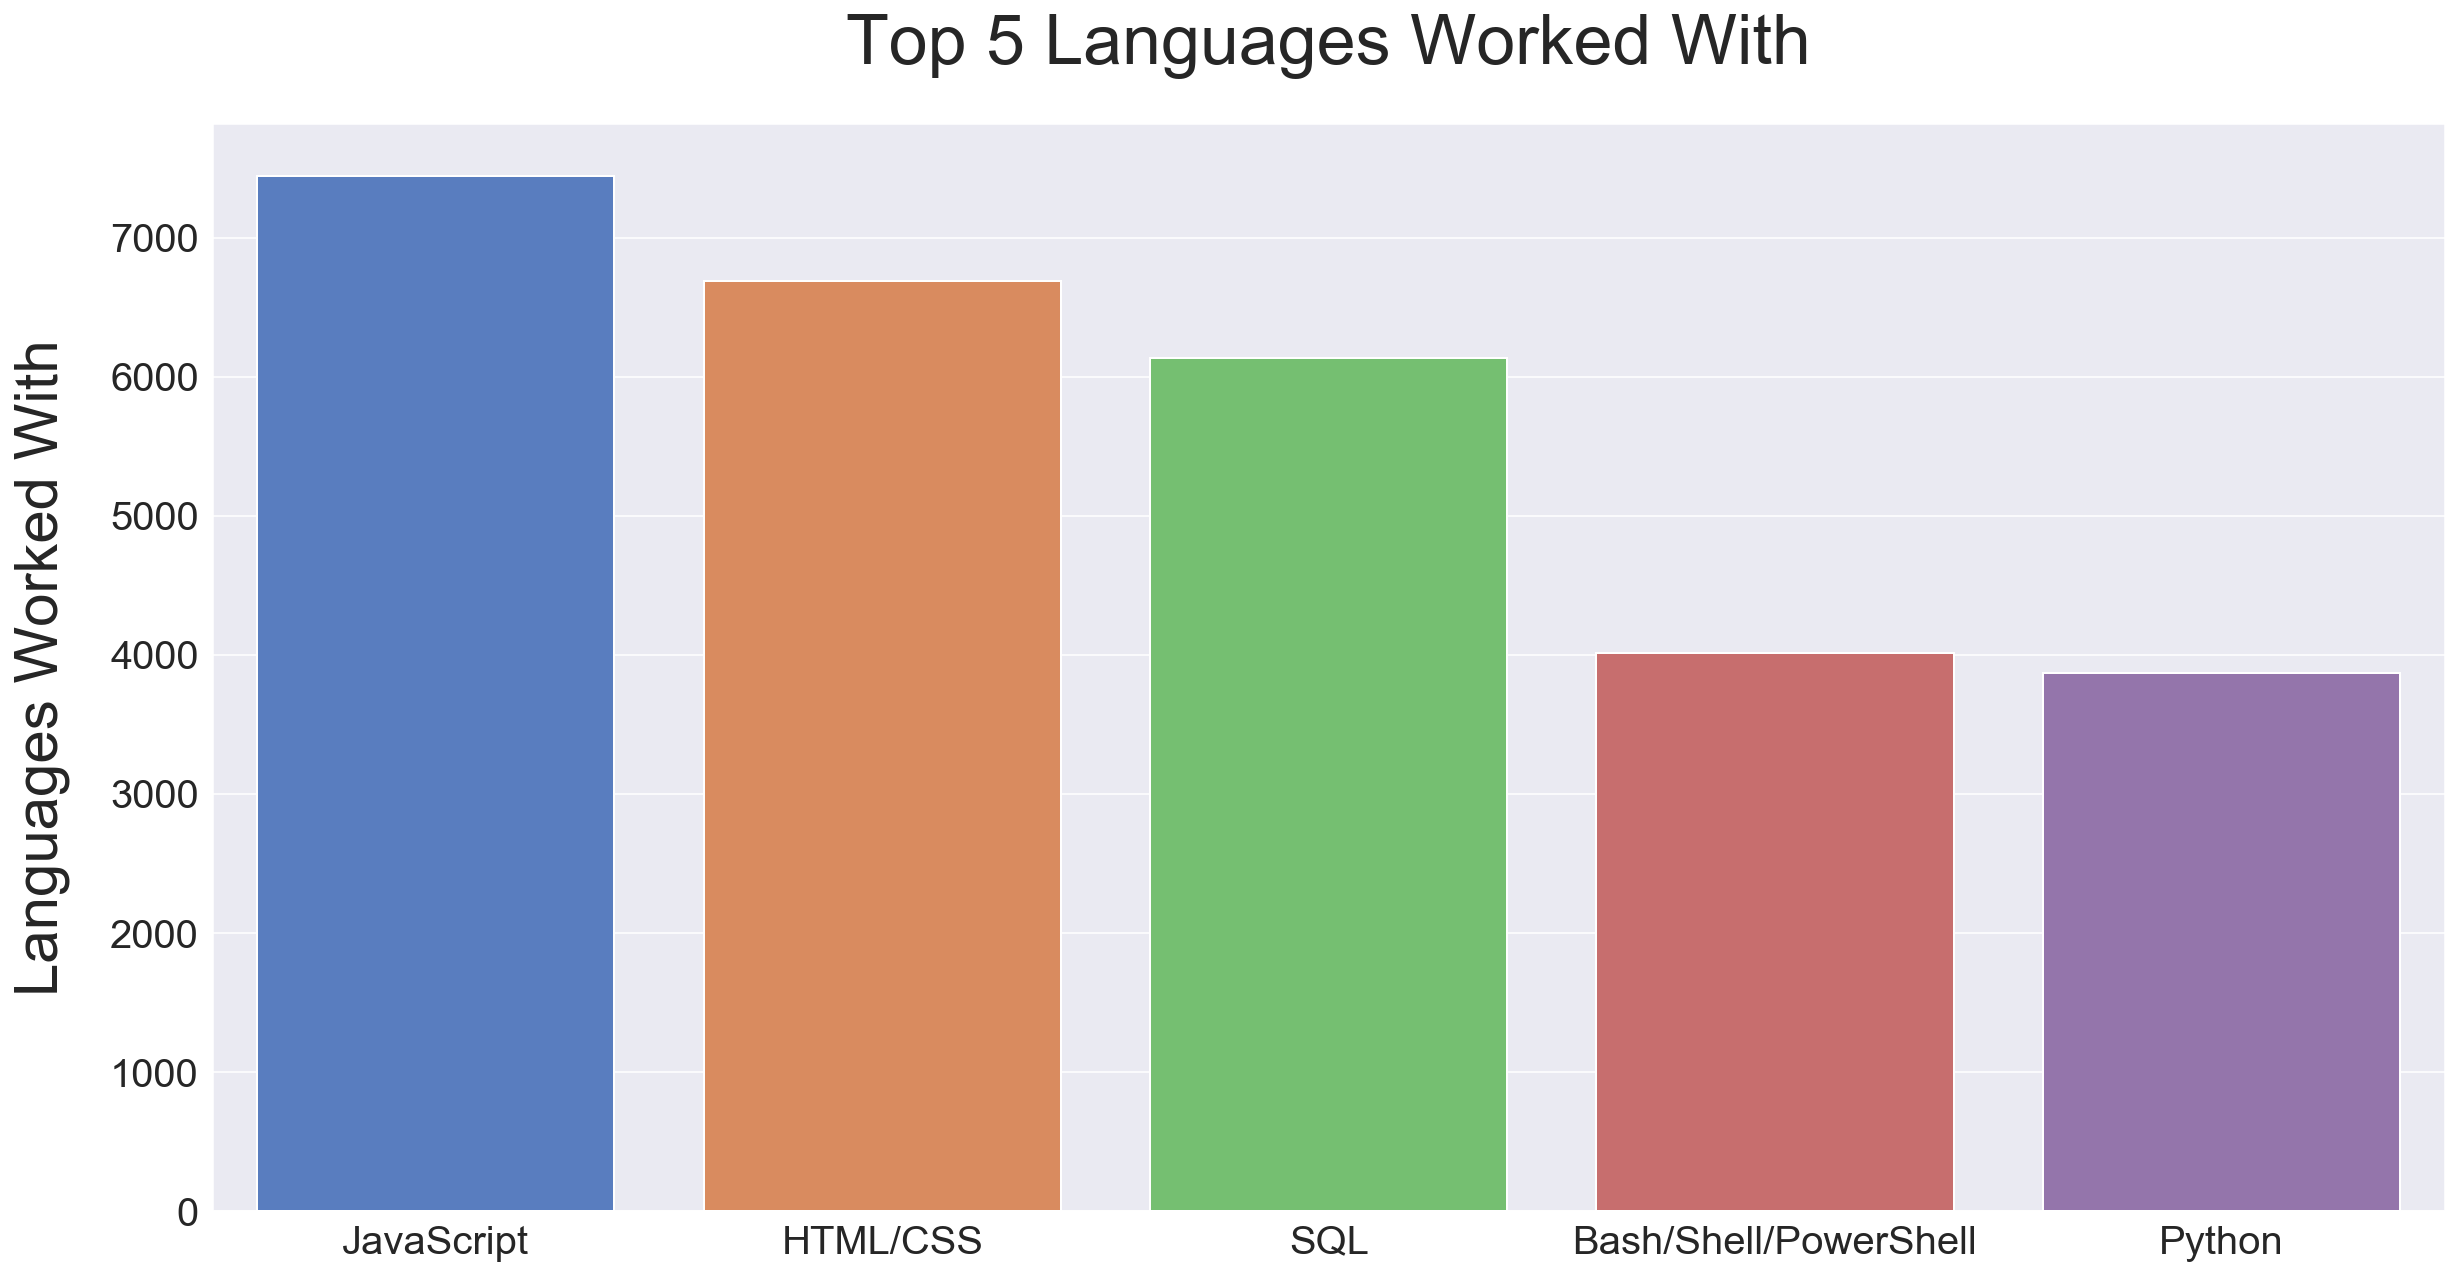

In [21]:
count_and_plot_top_n_tech(current_language_list, 5, name='Languages Worked With')

### <a class="anchor" id="top_n_language_desired">Top N Desired Languages</a>

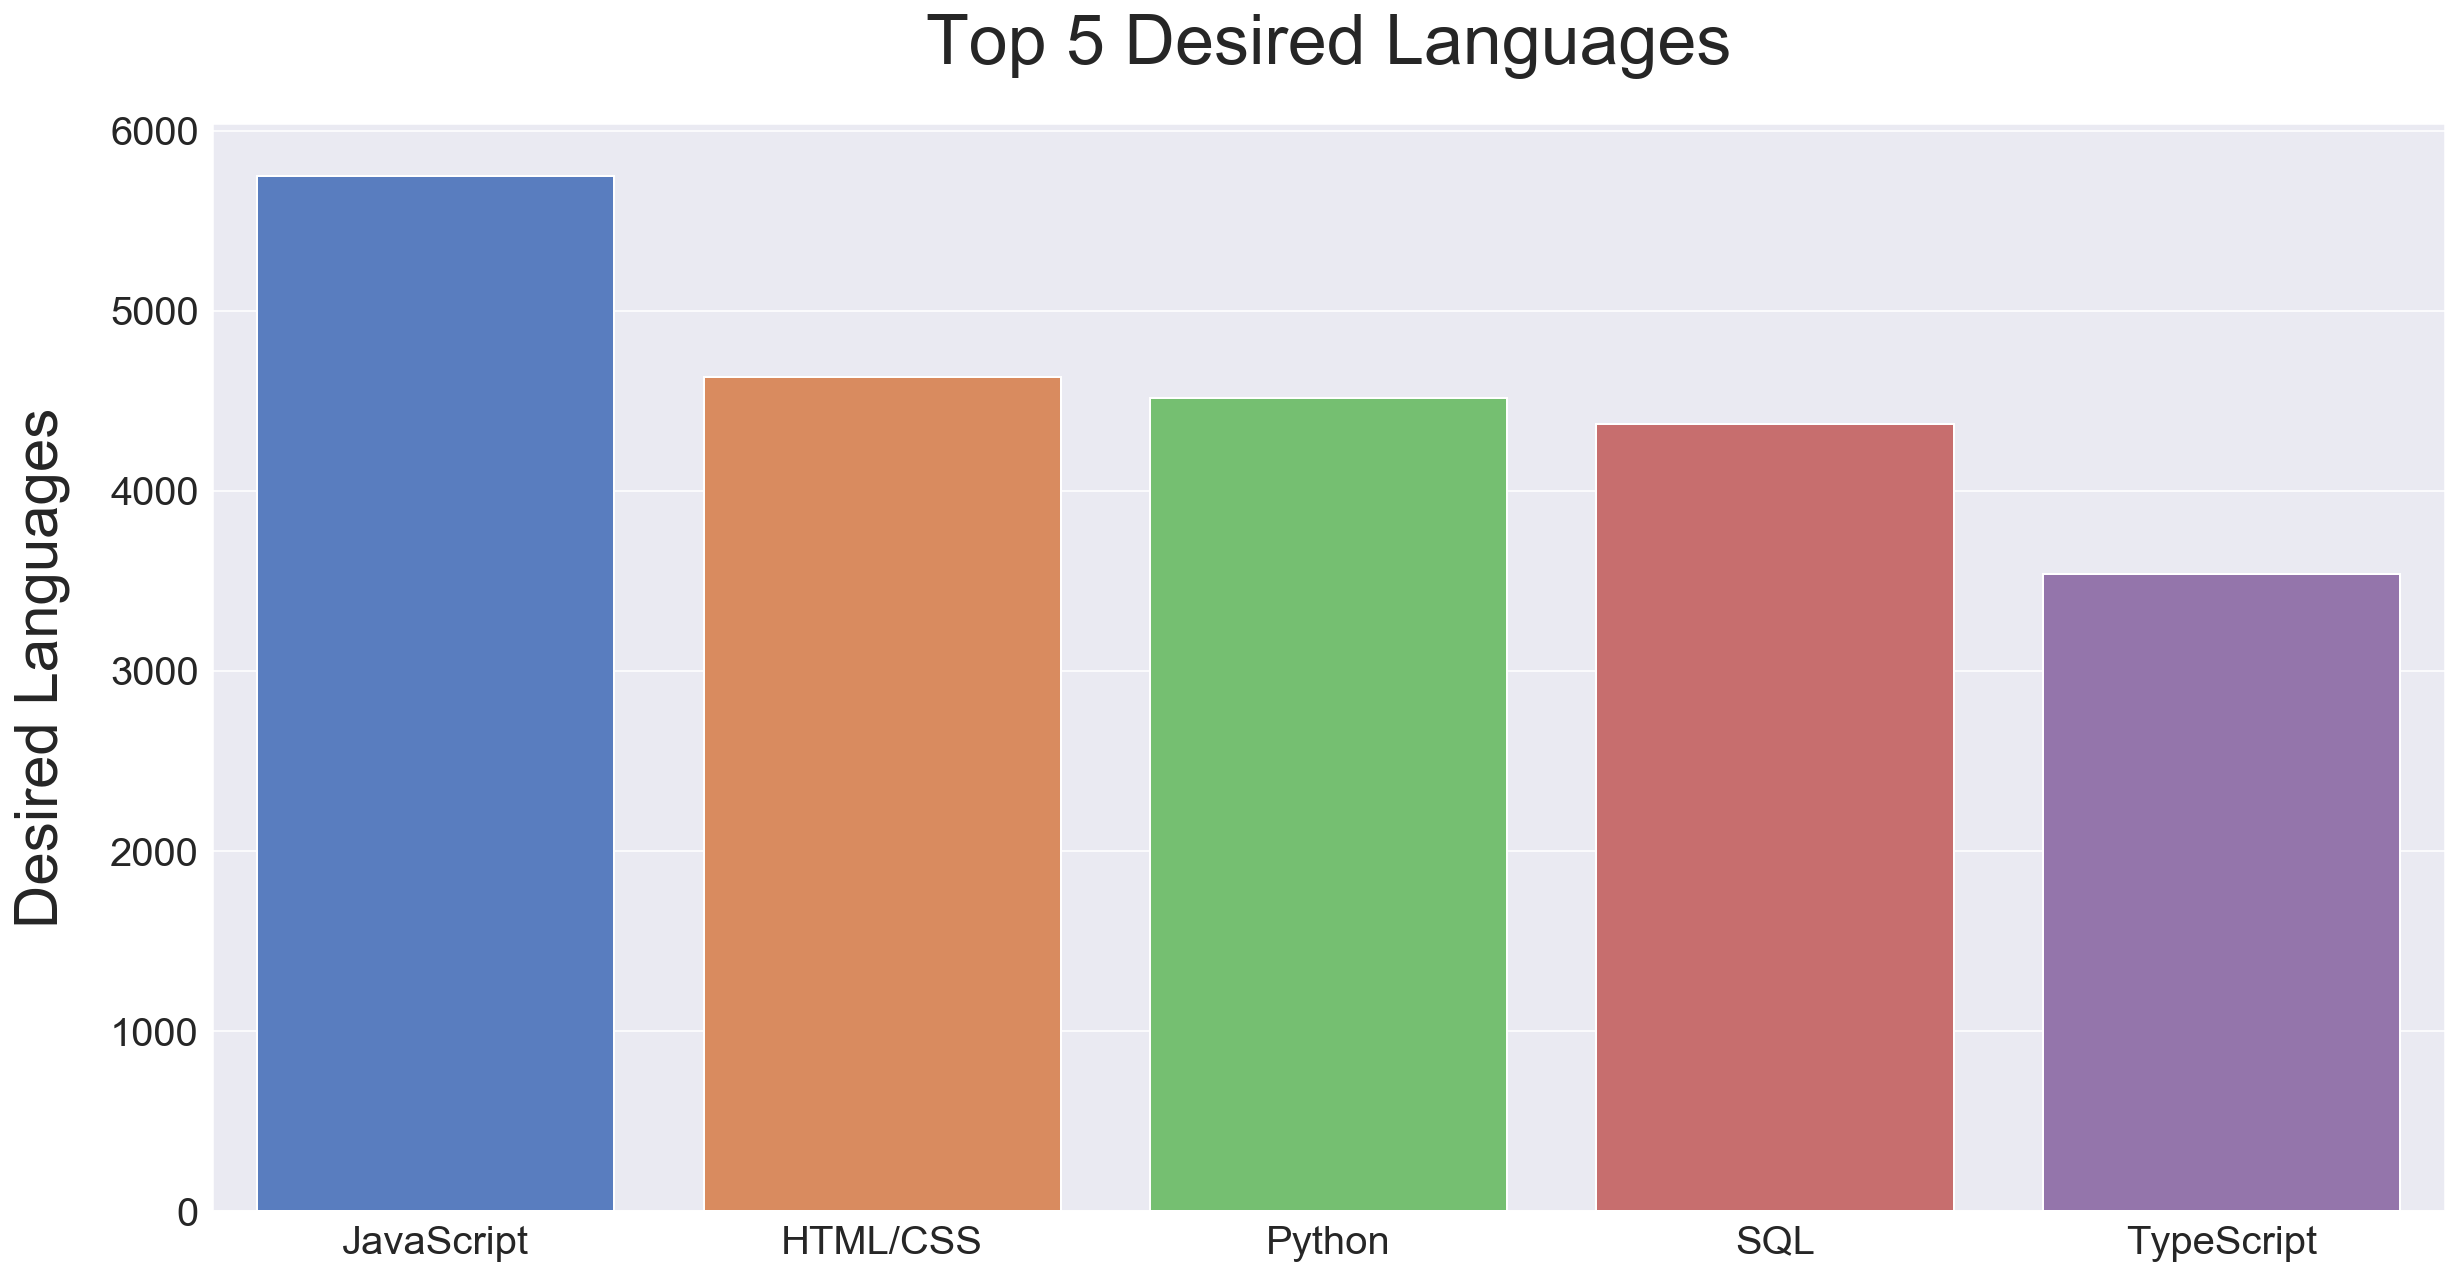

In [22]:
count_and_plot_top_n_tech(desired_langauge_list, 5, name='Desired Languages')

### <a class="anchor" id="current_desired_database">Current & Desired Database</a>

In [23]:
current_database_list, desired_database_list = count_tech_function('DatabaseWorkedWith', 'DatabaseDesireNextYear')

### <a class="anchor" id="top_n_database_worked_with">Top N Database Worked With</a>

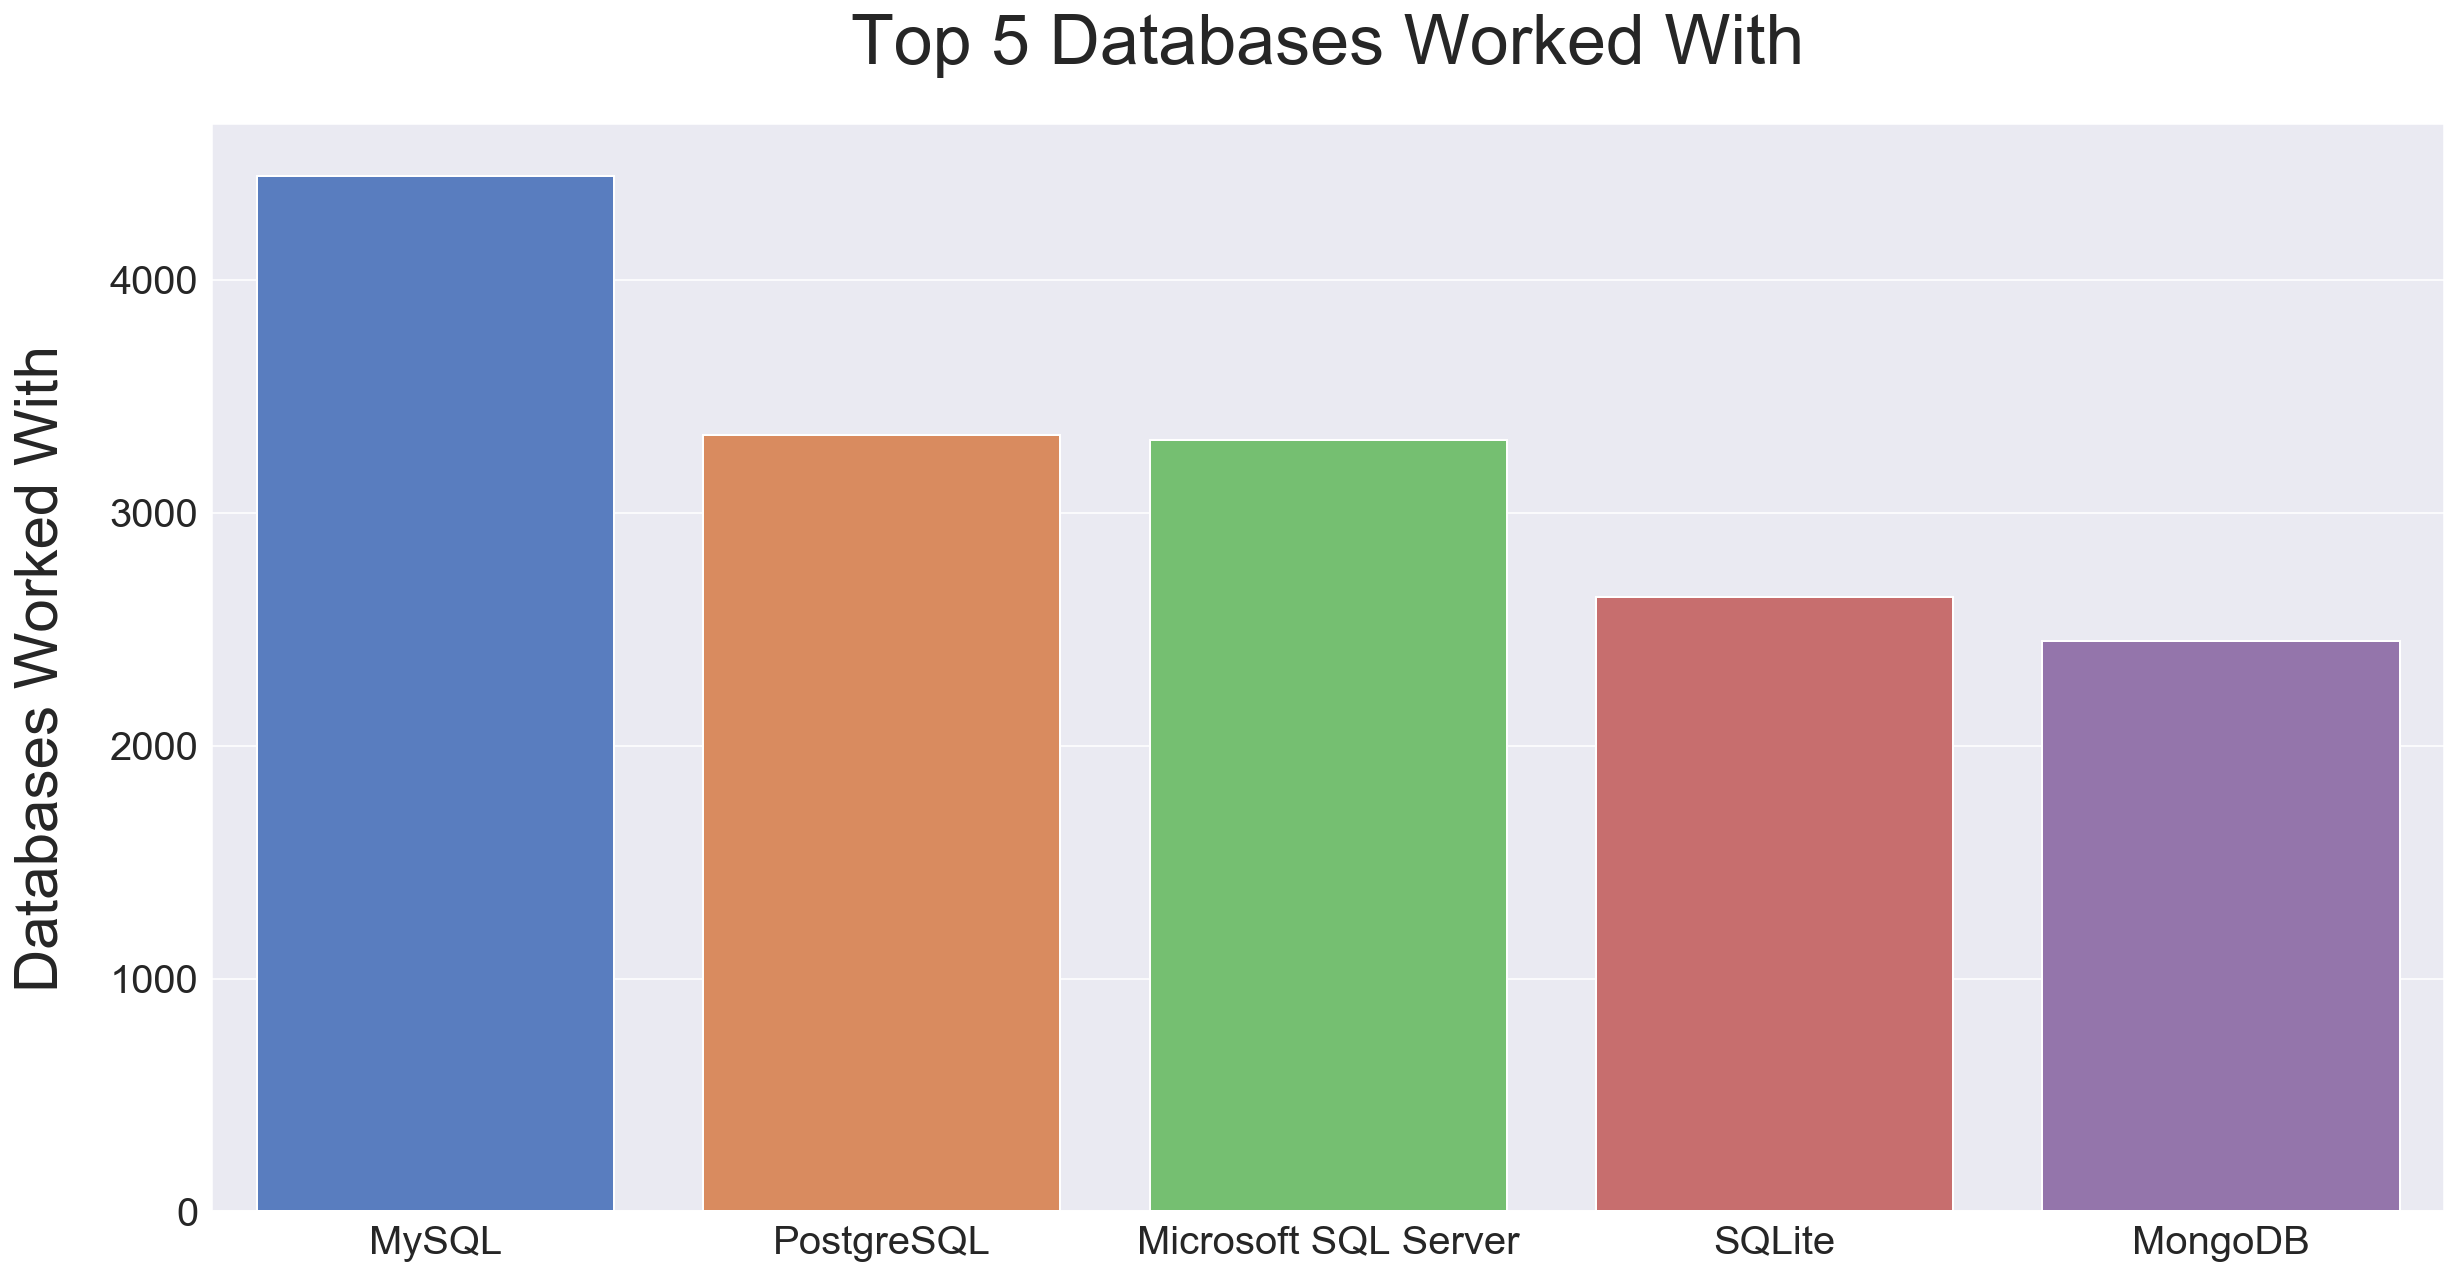

In [24]:
count_and_plot_top_n_tech(current_database_list, 5, name='Databases Worked With')

### <a class="anchor" id="top_n_database_desired">Top N Desired Databases</a>


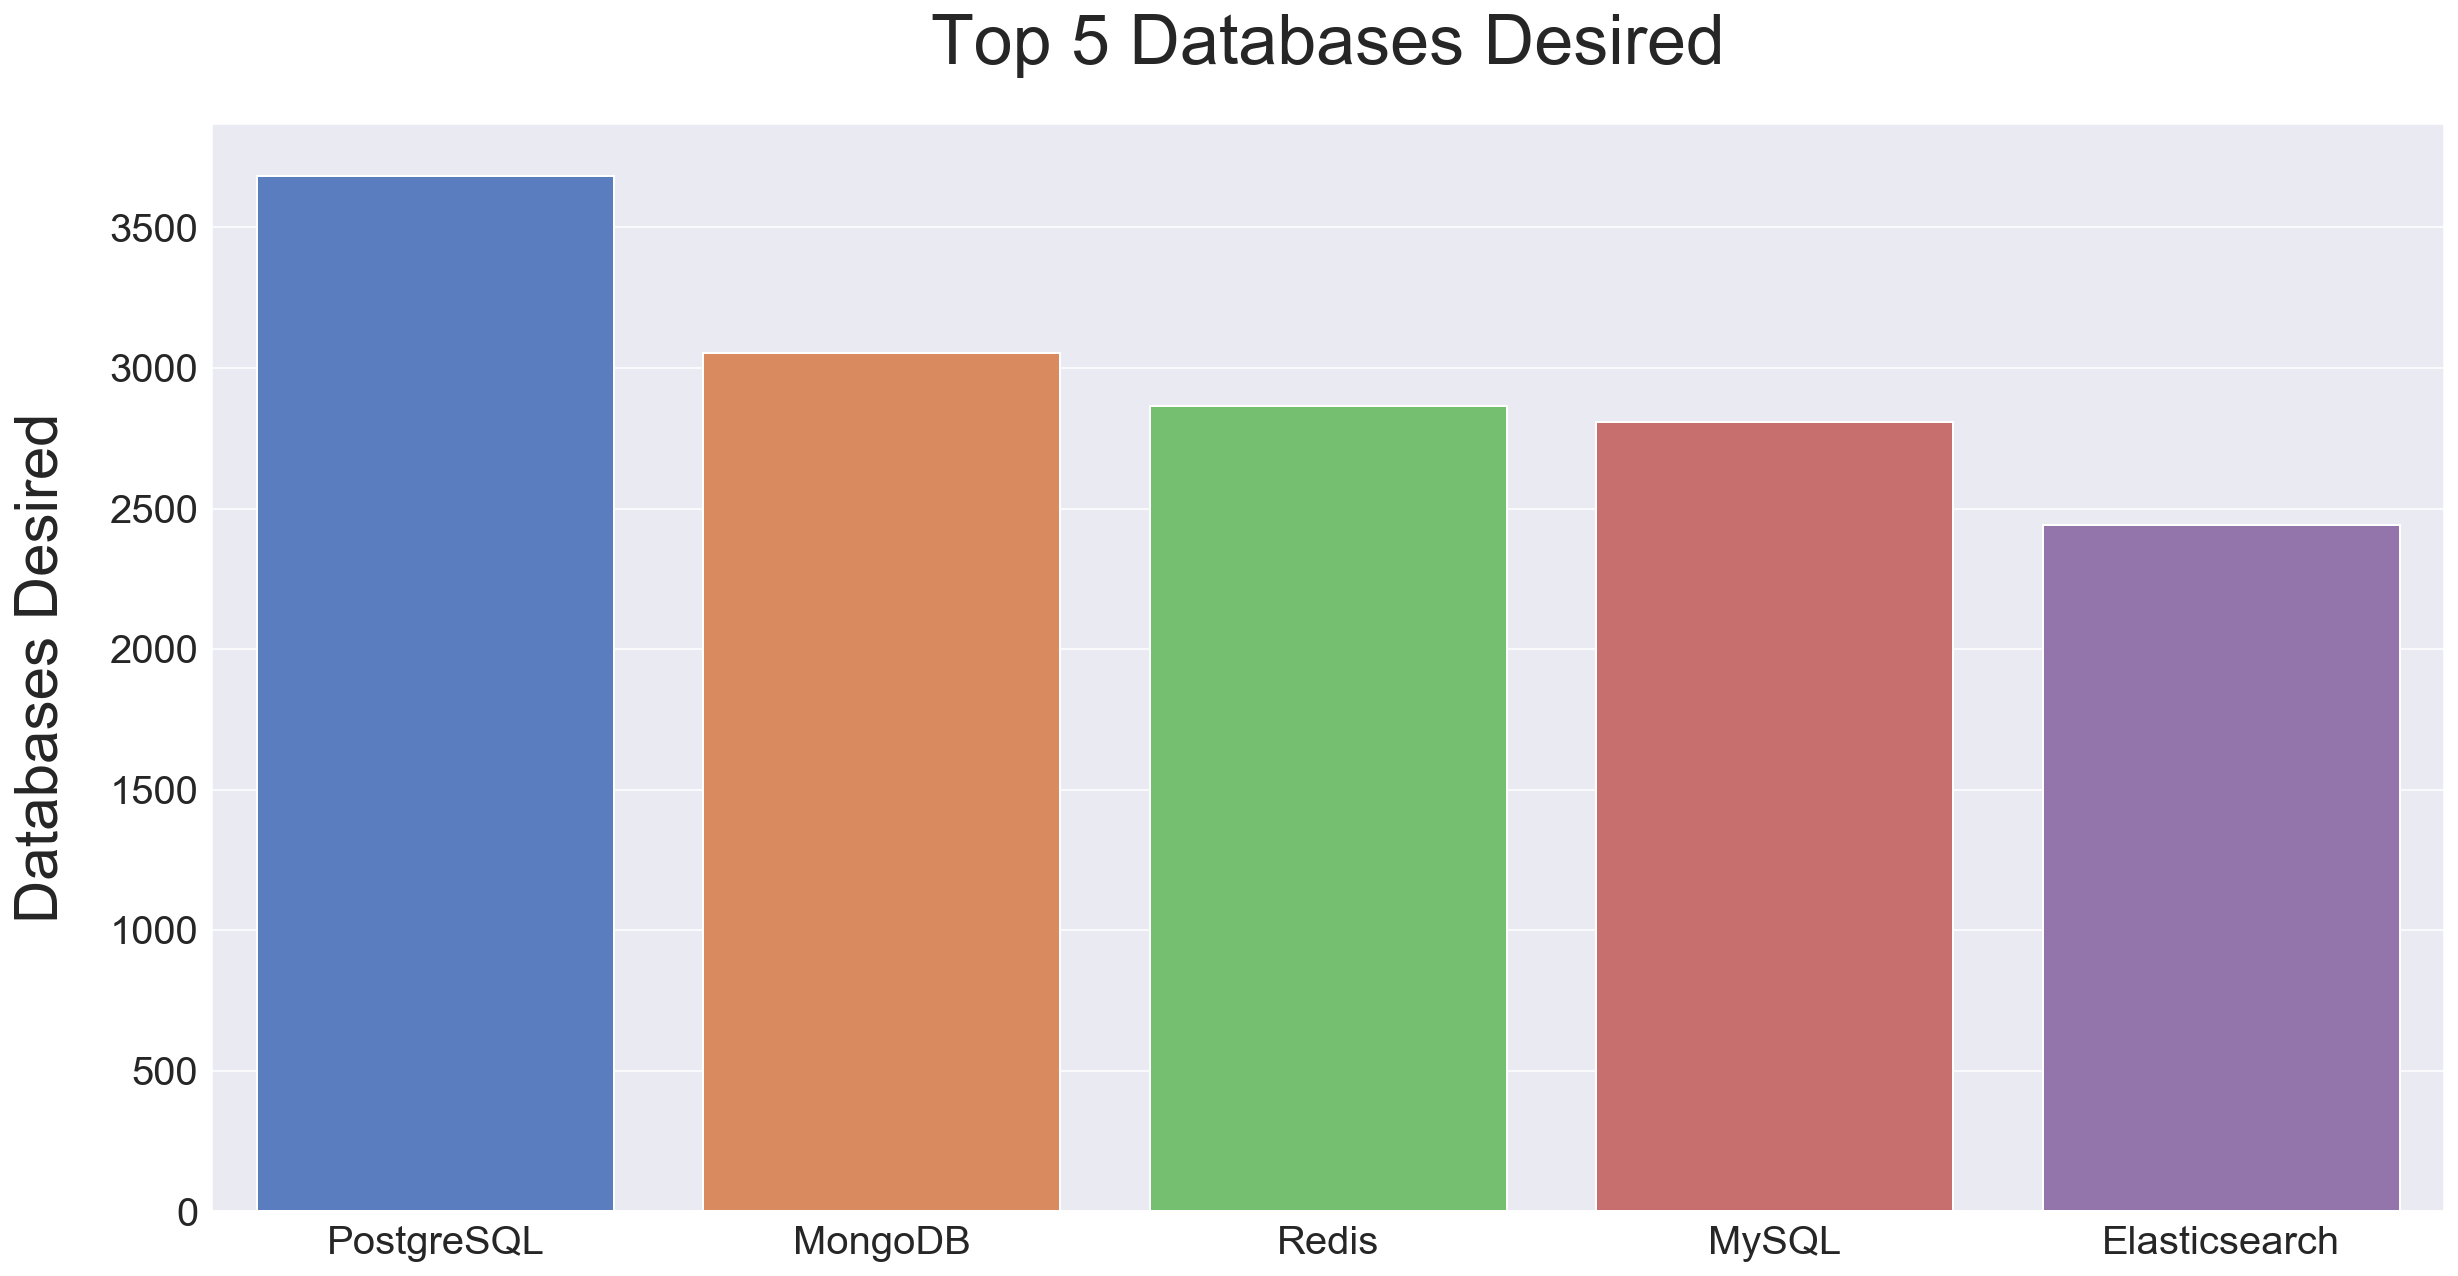

In [25]:
count_and_plot_top_n_tech(desired_database_list, 5, name='Databases Desired')

### <a class="anchor" id="language_pop_and_avg_salary">Language Popularity & Average Salary</a>

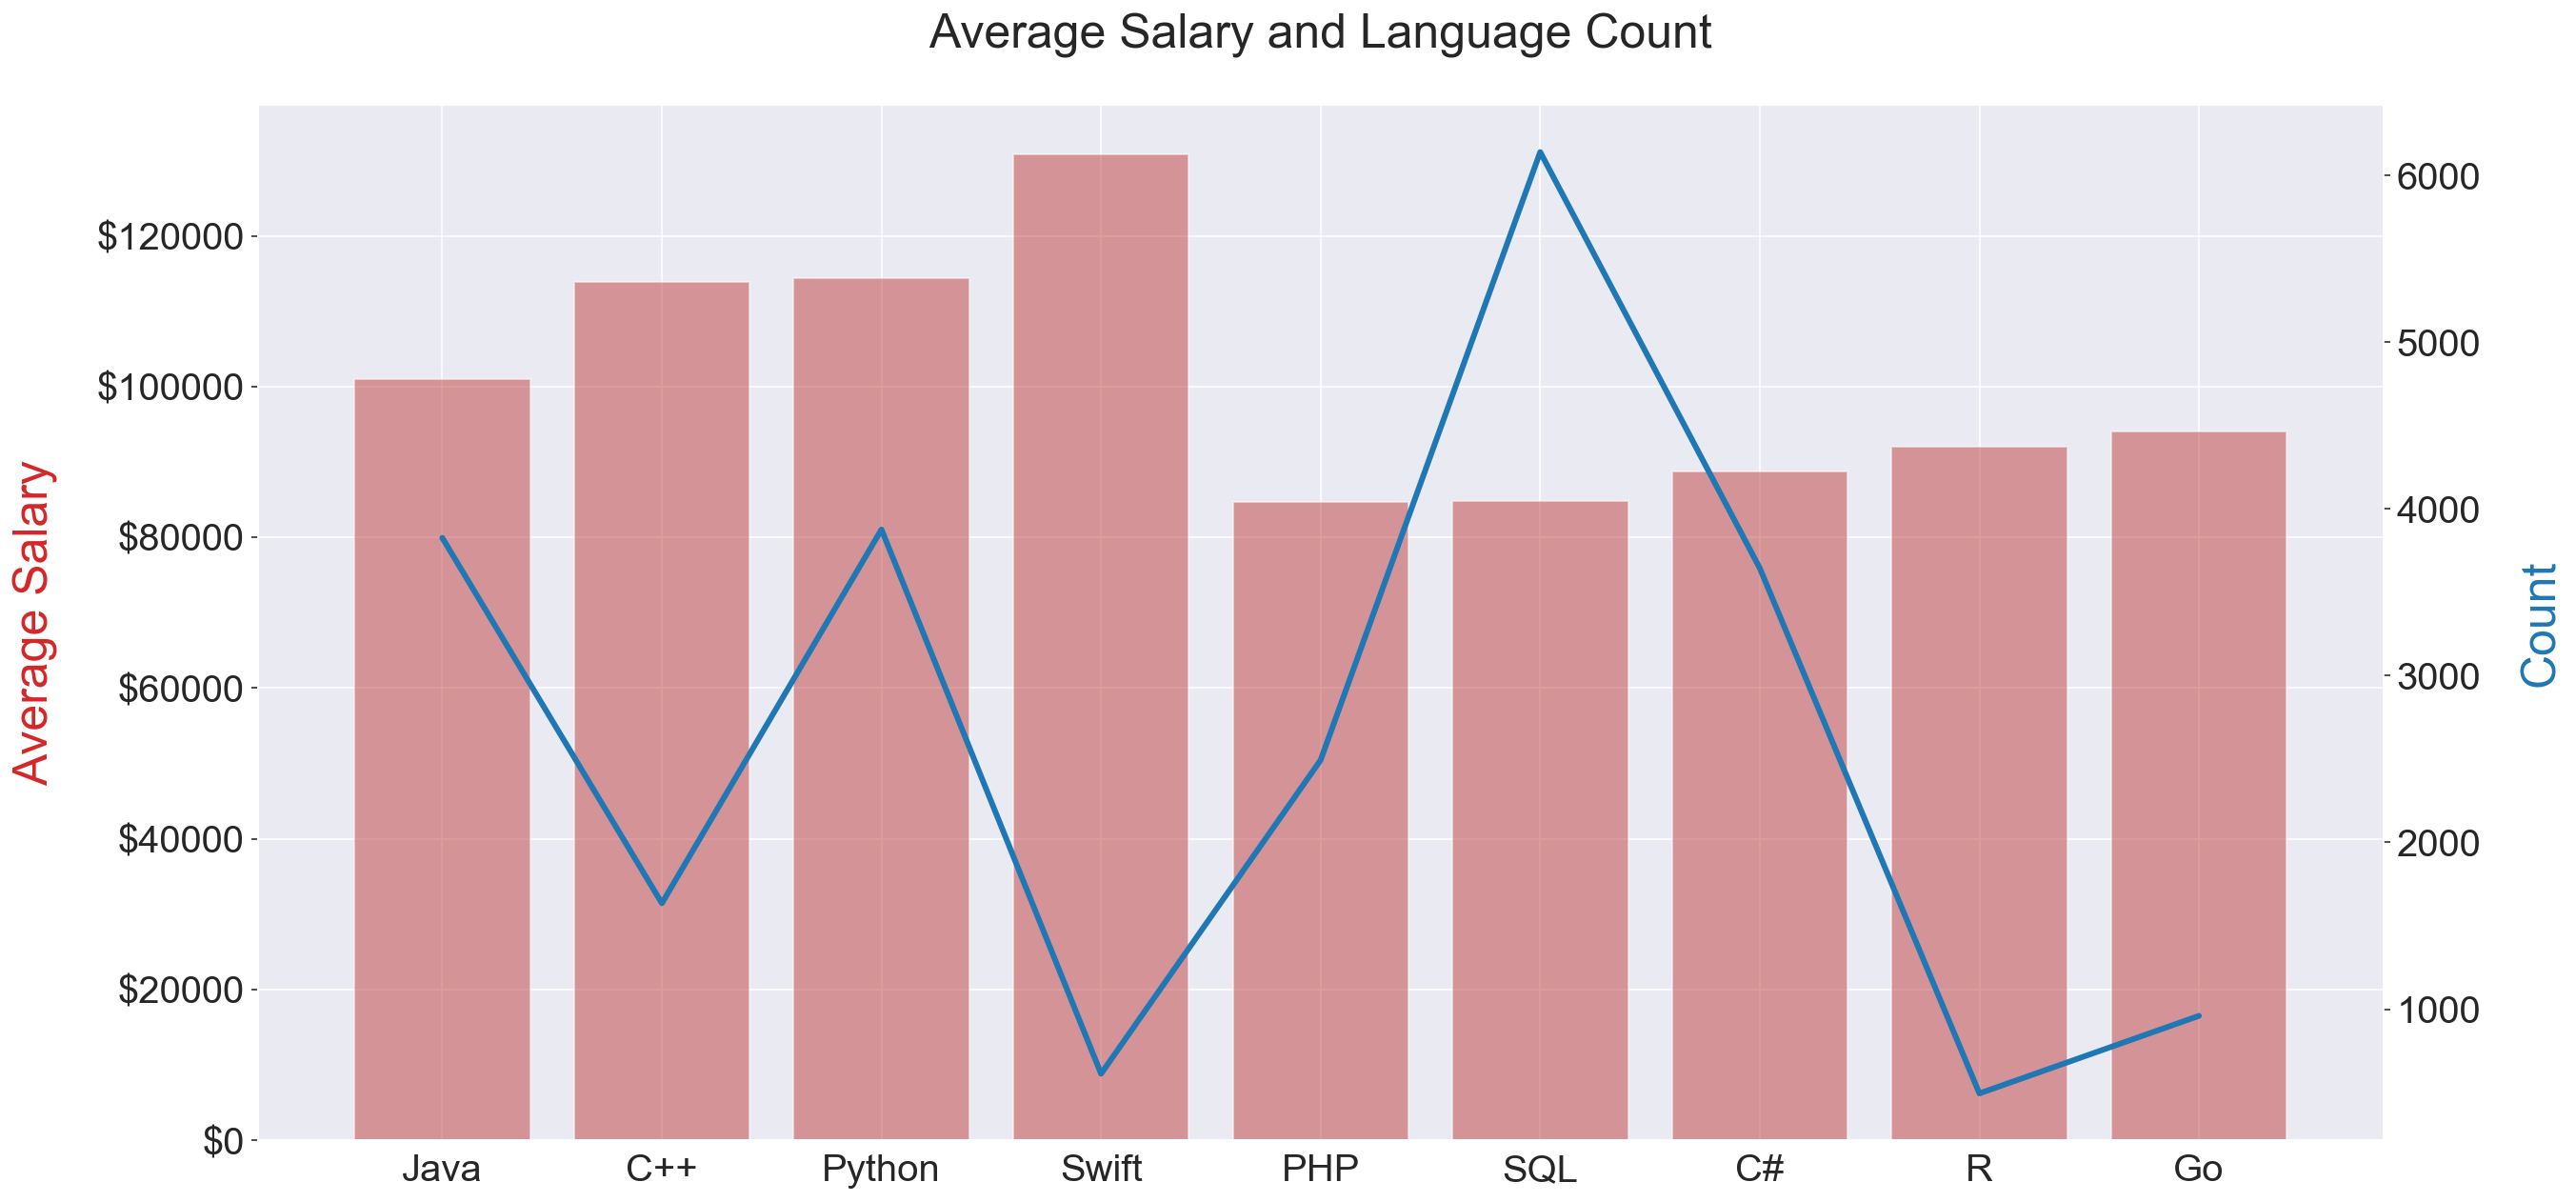

In [26]:
language_popularity_df = pd.DataFrame().from_dict(dict(Counter(current_language_list)), orient='index').rename(columns={0: 'count'})

language_popularity_df = language_popularity_df.sort_values('count', ascending=False).reset_index()

language_popularity_and_salary_df = language_popularity_df.merge(salary_data, left_on='index', right_on='Language').sort_values('Average Annual Salary')


title = 'Average Salary and Language Count'
fig, ax1 = plt.subplots()
ax1_color = 'tab:red'
ax1 = sns.barplot(data=language_popularity_and_salary_df, x='Language', y='Average Salary', alpha=0.5, color=ax1_color)
ax1.set_title(title, pad=30, fontsize=25)
y_ticks = ax1.get_yticks()
ax1.set(yticklabels=[f"${int(x)}" for x in y_ticks], xlabel=None)
ax1.set_ylabel('Average Salary', color=ax1_color, fontsize=25, labelpad=20)
ax1.grid(True)


ax2_color = 'tab:blue'
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=language_popularity_and_salary_df, x='Language', y='count', color=ax2_color, linewidth=3.0)
ax2.set_ylabel('Count', color=ax2_color, fontsize=25, labelpad=20)
ax2.grid(False)

plt.savefig(f"{plot_path}{title}.png", dpi=300)


### <a class="anchor" id="github_barchart">Github BarChart</a>

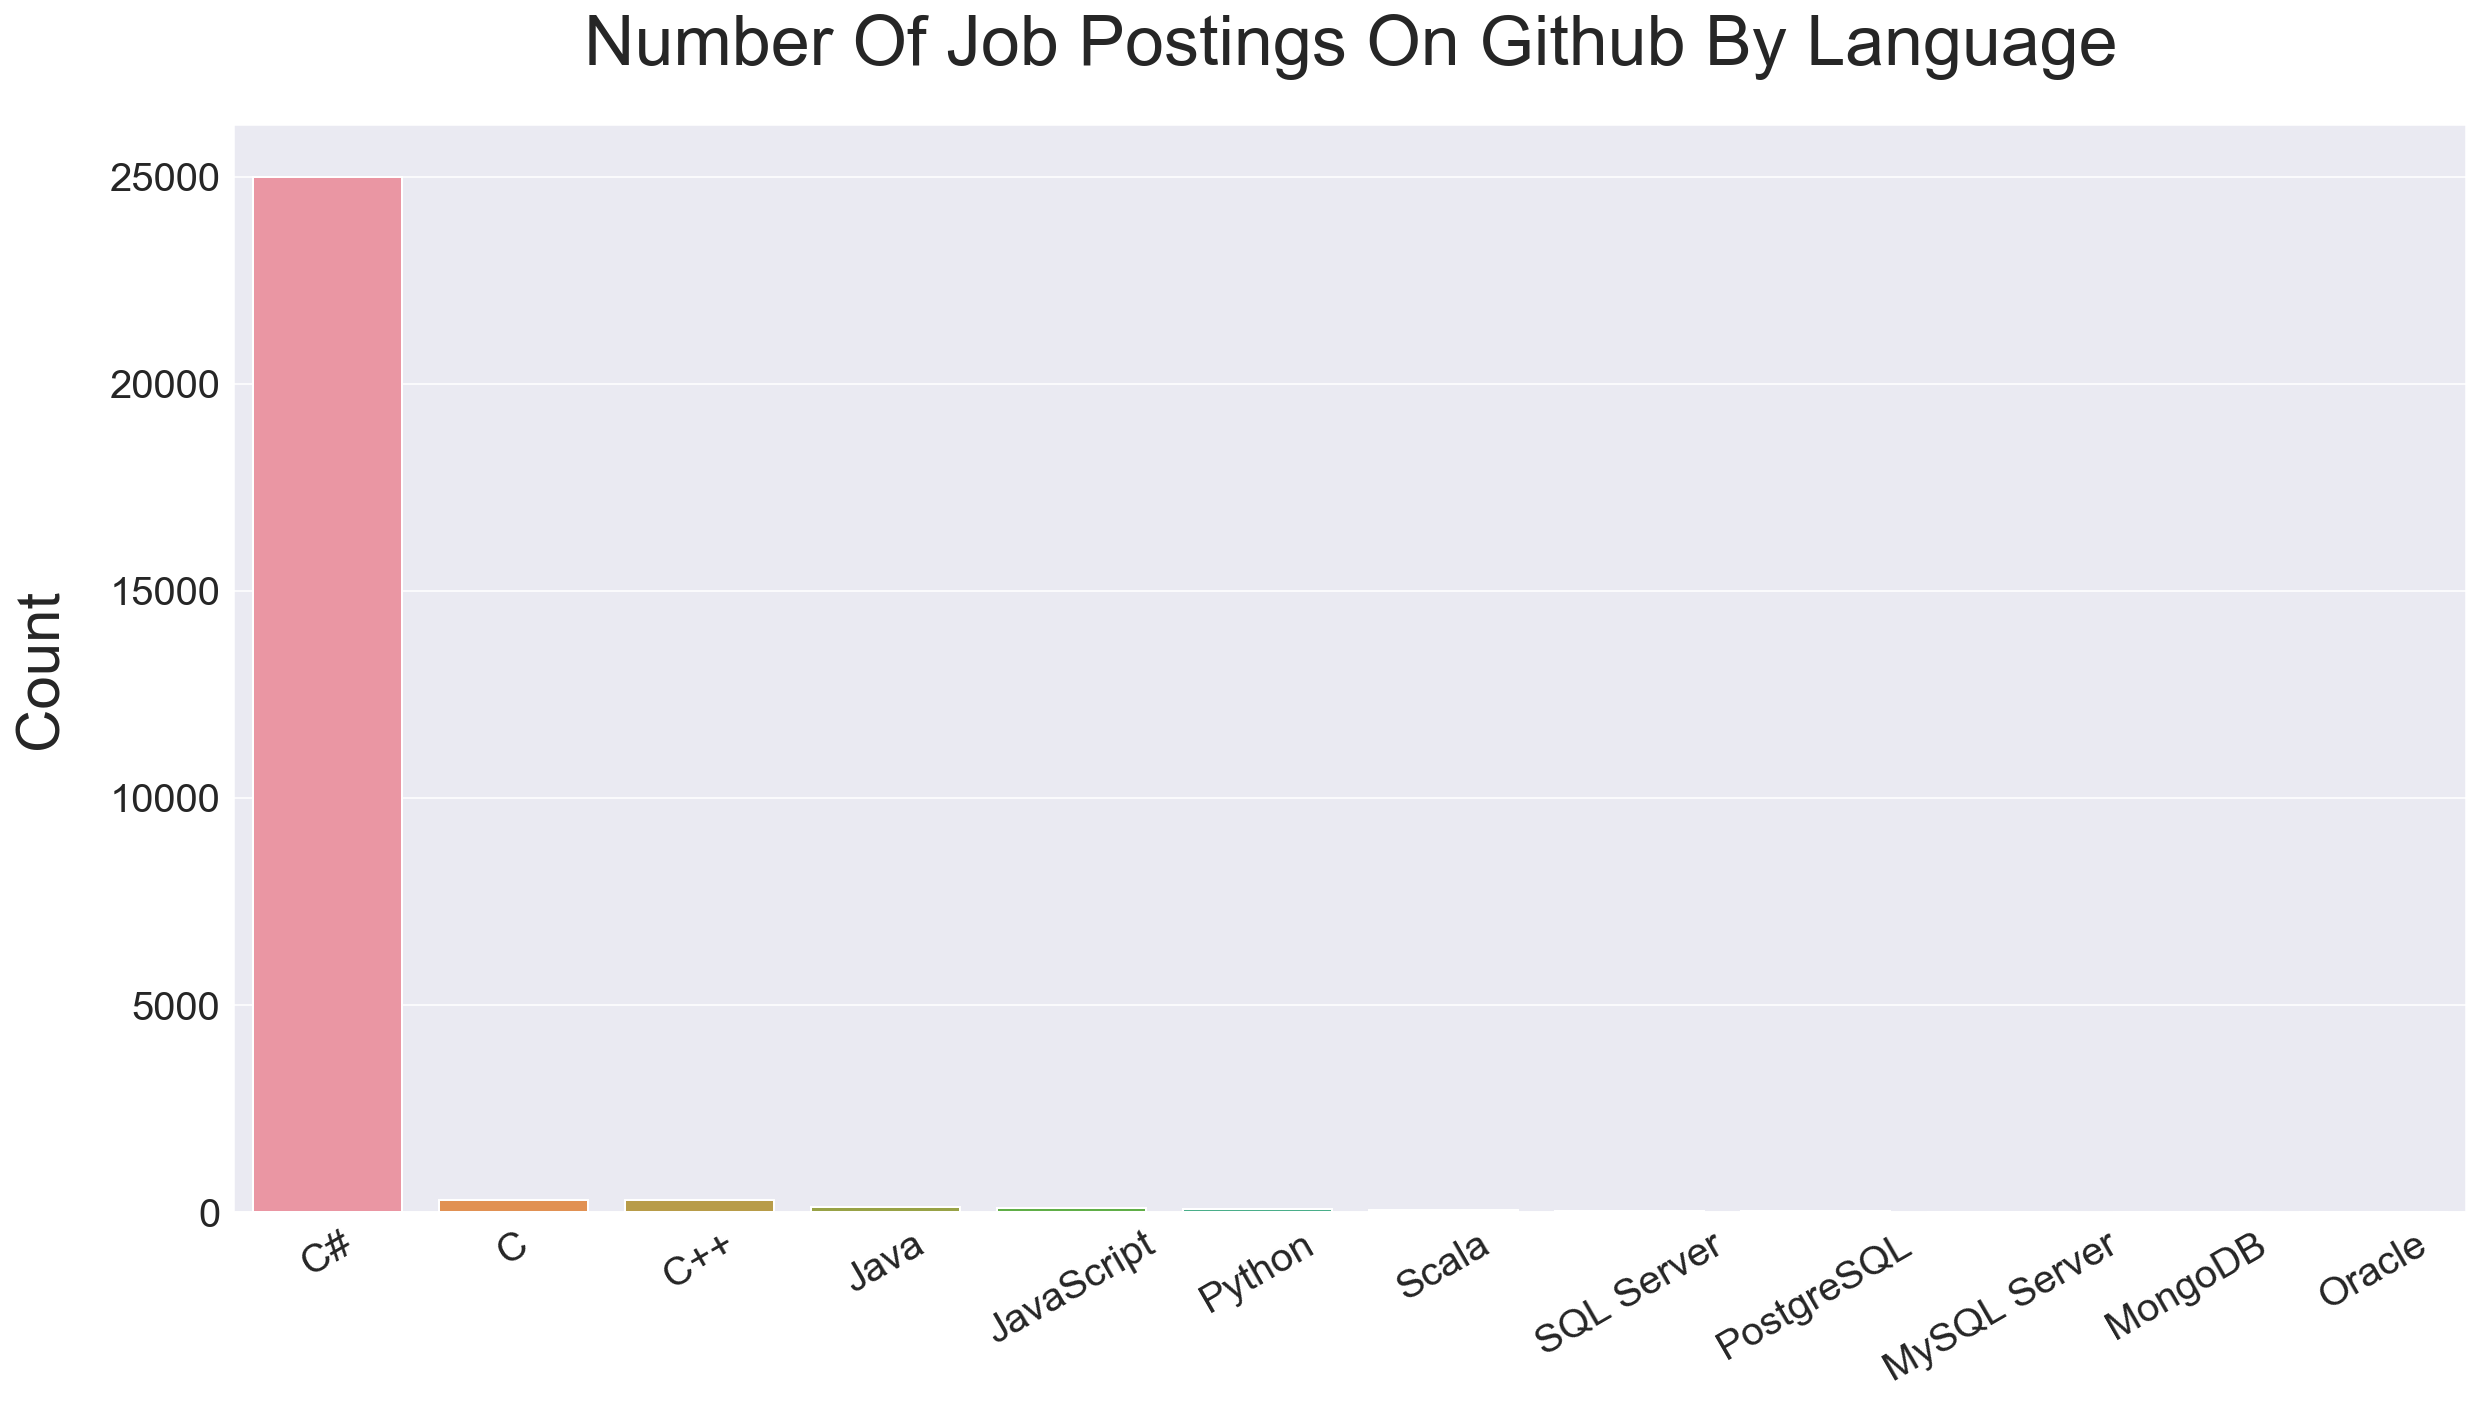

In [27]:
technology_data.head(5)


title = 'Number of job postings on Github by Language'

fig = sns.barplot(data=technology_data.sort_values('count', ascending=False), x='technology', y='count')
fig.set_xticklabels(fig.get_xticklabels(), rotation=30)
fig.set(xlabel='')
format_plot(fig, title)


### <a class="anchor" id="avg_salary_barchart">Average Salary BarChart</a>

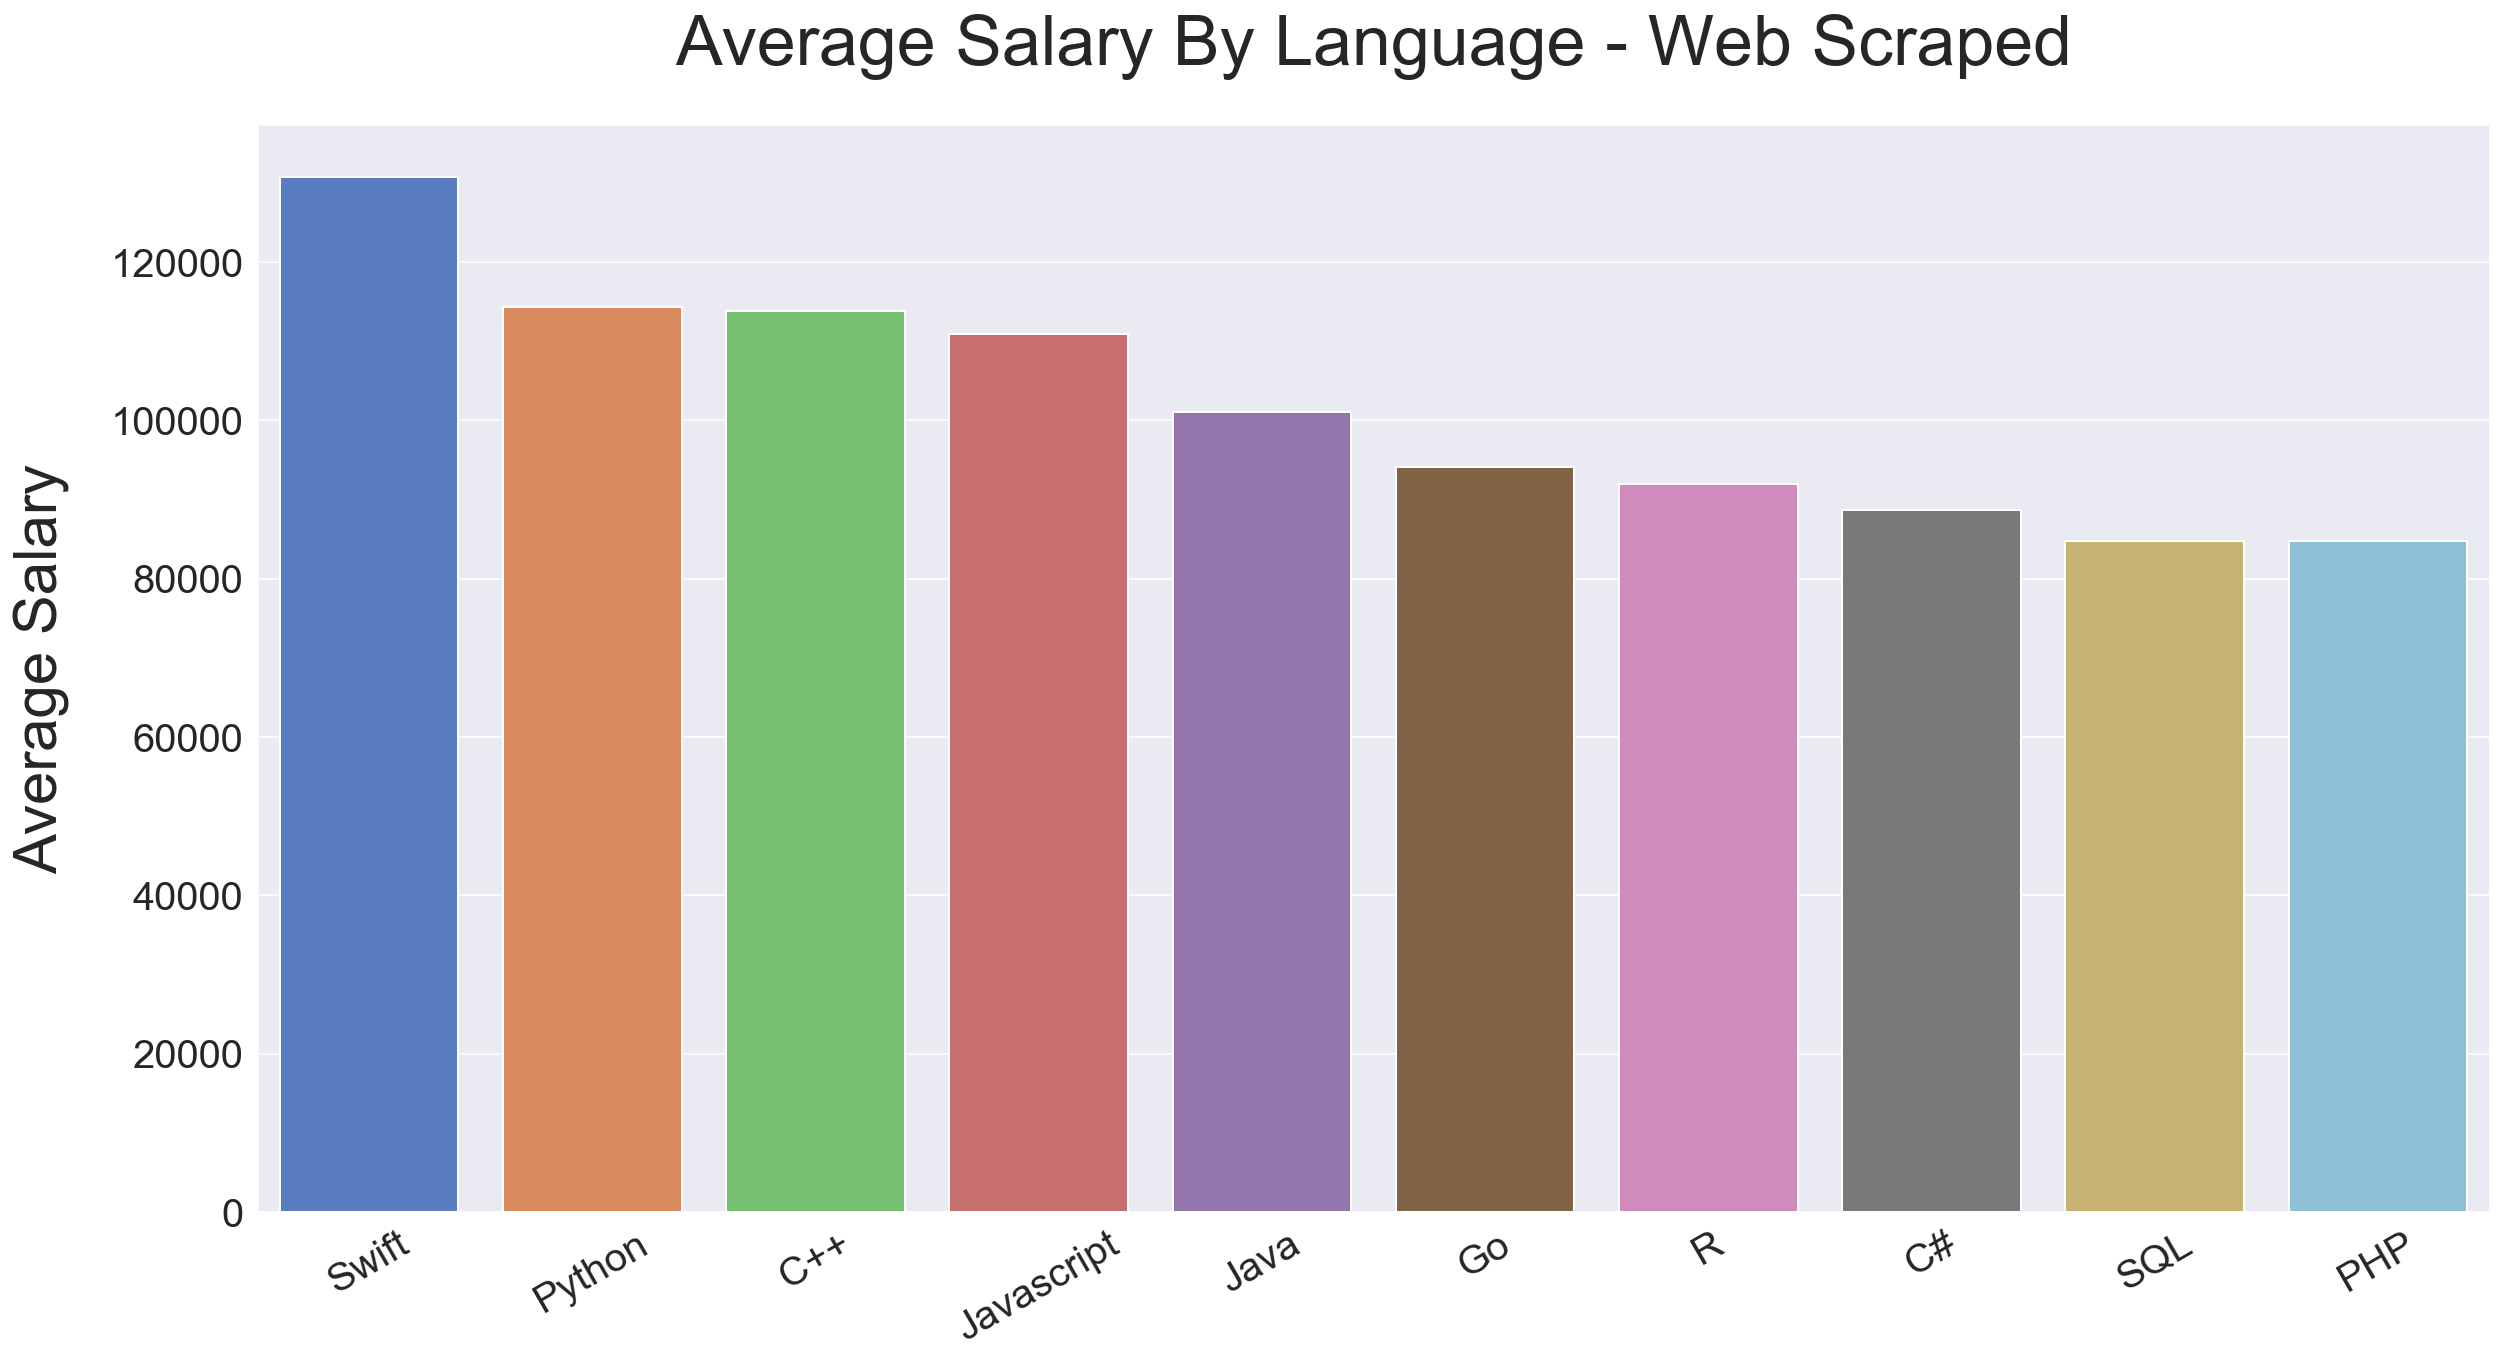

In [28]:
salary_data

title = 'Average Salary by Language - Web Scraped'

fig = sns.barplot(data=salary_data.sort_values('Average Salary', ascending=False), x='Language', y='Average Salary')
fig.set_xticklabels(fig.get_xticklabels(), rotation=30)
fig.set(xlabel='')
format_plot(fig, title)

# <a class="anchor" id="datasets">Datasets</a>

### <a class="anchor" id="salary_data">Salary Data</a>

In [29]:
salary_data.head(1)

,Language,Created By,Average Annual Salary,Learning Difficulty,Average Salary
0,Python,Guido van Rossum,"$114,383",Easy,114383


### <a class="anchor" id="technology_data">Technology Data</a>

In [30]:
technology_data.head(1)

,technology,count
0,C,296


### <a class="anchor" id="survey_data">Survey Data</a>


In [31]:
survey_data.head(1)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,EdLevelVal,JobSatVal,CareerSatVal,HobbyistVal,MainBranchVal,GenderReduced,Continent,AgeGroup,ConvertedCompGroup
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,1,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,"[C, C++, C#, Python, SQL]","[C, C#, JavaScript, SQL]","[MySQL, SQLite]","[MySQL, SQLite]",Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,4,4,5,0,1,Man,North America,18 to 24,$50000 to $74999


In [32]:
modified_survey_data.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,EdLevelVal,JobSatVal,CareerSatVal,HobbyistVal,MainBranchVal,GenderReduced,Continent,AgeGroup,ConvertedCompGroup,Assembly,Bash/Shell/PowerShell,C,C#,C++,Clojure,Dart,Elixir,Erlang,F#,Go,HTML/CSS,Java,JavaScript,Kotlin,Objective-C,PHP,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA,WebAssembly
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,1,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,"[C, C++, C#, Python, SQL]","[C, C#, JavaScript, SQL]","[MySQL, SQLite]","[MySQL, SQLite]",Linux;Windows,Linux;Windows,NaN,...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,4,4,5,0,1,Man,North America,18 to 24,$50000 to $74999,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the deve...",Not sure,I have some influence,"[Bash/Shell/PowerShell, C#, HTML/CSS, JavaScri...","[Bash/Shell/PowerShell, C, HTML/CSS, JavaScrip...","[DynamoDB, PostgreSQL, SQLite]","[PostgreSQL, Redis, SQLite]",AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,App

### <a class="anchor" id="save_modified_version" >Save Modified Version</a>

In [33]:
modified_survey_data = modified_survey_data[['Respondent', 'Age', 'AgeGroup', 'Country', 'Continent', 'ConvertedComp','ConvertedCompGroup', 'LanguageWorkedWith', 'EdLevelVal', 'EdLevel', 'JobSat', 'YearsCodePro'] + list_language_info_unique]
print (len (modified_survey_data))
modified_survey_data = modified_survey_data.dropna()
print (len(modified_survey_data))
modified_survey_data.to_csv(f'{data_path}survey_data_modified.csv')

9914
9550


### <a class="anchor" id="graveyard" >Code Graveyard</a>

In [34]:
### Deliberately throw an error so no dead spooky code gets run

pd.spooky_panda()

AttributeError: module 'pandas' has no attribute 'spooky_panda'

### Ridge Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


x = modified_survey_data[['Age', 'EdLevelVal', 'YearsCodePro'] + list_language_info_unique]

model = Ridge(alpha=0.99)

cv = RepeatedKFold(n_splits=10, n_repeats=3)

scores = cross_val_score(model, x, y, cv=cv, n_jobs=-1)

print (np.mean(scores))

grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

search = GridSearchCV(model, grid, cv=cv, n_jobs=-1)

results = search.fit(x, y)

print (results.best_score_)
print (results.best_params_)

In [ ]:
language_sum = int(modified_survey_data[list_language_info_unique].sum().sum())
list_language_info_unique_percentage = [f"{x}Percentage" for x in list_language_info_unique]

for language in list_language_info_unique:
    modified_survey_data[f'{language}Percentage'] = (modified_survey_data[language].sum() / language_sum) * 100
    
modified_survey_data.head(5)

### Model Function

In [ ]:
def fit_linear_model(x, y, model=LinearRegression(), print_output=False):

    x_train, x_test, y_train, y_test = train_test_split(x, y)

    model.fit(x_train, y_train)

    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    
    dicto = {'Columns': x.columns.values[0],
             'TrainScore': train_score,
             'TestScore': test_score}
    
    for name, coef in zip(x.columns,model.coef_):

        dicto.update({name:coef})
    
    if print_output == True:
        print (F"Train Score: {train_score}")
        print (F"Test Score: {test_score}")
        print ('*******')
        print (f"Columns:\n{x.columns.values} \n")
#         print (dicto)
    
    return pd.DataFrame(dicto, index=[0])

### Find all combinations of columns

Don't do this. Or have a fire extenguisher nearby

In [ ]:
# import itertools
# all_combinations = []
# combi = ['Age', 'EdLevelVal', 'YearsCodePro']
# for r in range(len(combi) + 1):
    
#     combinations_object = itertools.combinations(combi, r)
#     combinations_list = list(combinations_object)
#     print (combinations_list)
#     all_combinations += combinations_list

In [ ]:
# print (all_combinations)

### Multiple Linear Regression with Age, EdLevelVal, YearsCodePro and Language Categories

Currently best one, but still awful.

In [ ]:

x = modified_survey_data[['Age', 'EdLevelVal', 'YearsCodePro'] + list_language_info_unique]
y = modified_survey_data['ConvertedComp']

fit_linear_model(x, y, model=LinearRegression(), print_output=True)





In [ ]:
### Multiple Linear Regression with Age, EdLevelVal, YearsCodePro + Percentage Val

x = modified_survey_data[['Age', 'EdLevelVal', 'YearsCodePro'] + list_language_info_unique_percentage]
y = modified_survey_data['ConvertedComp']

fit_linear_model(x, y, model=LinearRegression(), print_output=True)

In [ ]:
x = modified_survey_data[['Age', 'EdLevelVal', 'YearsCodePro']]
fit_linear_model(x, y, model=LinearRegression(), print_output=True)

In [ ]:
### Multiple Linear Regression with Age, EdLevelVal, YearsCodePro

In [ ]:
x = modified_survey_data[list_language_info_unique]

fit_linear_model(x, y, model=LinearRegression())

In [ ]:
# Lin Reg does very poorly

modified_survey_data.head(5)



model = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y)

model.fit(x_train, y_train)

print (model.score(x_train, y_train))
print (model.score(x_test, y_test))

### Language Popularity Effect on Salary 

In [ ]:


# def add_language_column(dataframe, column):
#     languages = set(language_info)
    

#     for i in range(len('b')):
#         print (i)
#         for lang in languages:
#                 dataframe[lang] = ''
#                 data = dataframe[column].iloc[[1]].values[0]
#                 if lang in data:

#                     dataframe.at[i, str(lang)] = 1
#                     print (dataframe[lang])
#                 else:
#                     dataframe.at[i, (str(lang))] = 0

                    
#     return dataframe
    
# #     dataframe
    

# # for i in range(0, length):
    
# #     data = survey_data['LanguageWorkedWith'].iloc[[i]].values[0]
# #     [language_info.append(x) for x in data]
    
    
    
# add_language_column(survey_data, 'LanguageWorkedWith')

### Distribution of Languages Known

In [ ]:
title = 'Distribution of number of languages known'
fig = sns.histplot(survey_data['NumberLanguagesKnown'])
xticks = survey_data['NumberLanguagesKnown'].unique()
fig.set_xticks(xticks)
format_plot(fig, title)

Double click for ghost:

 .-.
(o o) boo!
| O \
 \   \
  `~~~'

### Poly and ridge regression

In [ ]:
from sklearn.metrics import r2_score

title = 'Median Salary by Number of Languages Known - Globally'

num_languages_group = survey_data.groupby('EdLevelVal')['ConvertedComp'].median()

# num_languages_group = survey_data[['EdLevelVal', 'ConvertedComp']]




x = num_languages_group.index
y = num_languages_group


x_max = int(x.max())
y_max = int(y.max())

best_val = 0
best_score = 0
for i in range(0, 10):
    model = np.poly1d(np.polyfit(x, y, i))

    line = np.linspace(1, x_max, y_max)
    score = r2_score(y, model(x))
    
    if score > best_score:
        best_val = i
        best_score = score


model = np.poly1d(np.polyfit(x, y, best_val))
line = np.linspace(1, x_max, y_max)

fig = sns.scatterplot(x=x, y=y)
fig = sns.lineplot(x=line, y=model(line), color='red')

format_plot(fig, title, y_axis_currency=True)


print (best_val, best_score)

In [ ]:
ridge_test = []
ridge_train = []
best_score = -1
best_alpha = 0
Alpha = np.arange(0, 100, 0.1)

for alpha in Alpha:
    model = Ridge(alpha=alpha)
    model.fit(poly_x_train, y_train)
    
    ridge_test.append(model.score(poly_x_test, y_test))
    ridge_train.append(model.score(poly_x_train, y_train))
    score = model.score(poly_x_test, y_test)

    if score > best_score:
        best_score = score
        best_alpha = alpha
        
print (best_alpha)

In [ ]:
fig = sns.lineplot(x=Alpha, y=ridge_test, label='Validation')
fig = sns.lineplot(x=Alpha, y=ridge_train, label='Train')


fig.set(xlabel='Alpha', ylabel='R^2')

In [ ]:
print (best_alpha)
model = Ridge(alpha=best_alpha)
model.fit(poly_x_train, y_train)


poly_x = poly.fit_transform(np.array(x).reshape(-1, 1))




yhat = model.predict(poly_x)

sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=yhat)

In [ ]:
survey_data[['LanguageWorkedWith', 'LanguageDesireNextYear']]

In [ ]:
modified_survey_data = survey_data[['Respondent', 'Age', 'AgeGroup', 'Country', 'Continent', 'ConvertedComp', 'LanguageWorkedWith', 'EdLevelVal', 'YearsCodePro']]

modified_survey_data.to_excel(f'{data_path}survey_data_modified.xlsx')